# Name: Tong Nie

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
data = pd.read_csv("dataset_for_analyst_assignment_20201120.csv")
data.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [9]:
data.info()

# There are missing values in many columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64
 5   FIRST_PURCHASE_DAY                       11964 non-null  object 
 6   LAST_PURCHASE_DAY                        12027 non-null  object 
 7   USER_ID                                  21983 non-null  int64  
 8   BREAKFAST_PURCHASES                      12028 non-null  float64
 9   LUNCH_PURCHASES                          12028 non-null  float64
 10  EVENING_PURCHASES                        12028

In [875]:
data[data.PURCHASE_COUNT!=0].shape

(12028, 31)

# 1. Try to understand the reason of missing values

## 1.1  Non-null-value columns with the number of 12028. 
## Column (total 18 columns): 
## PURCHASE_COUNT_DELIVERY, PURCHASE_COUNT_TAKEAWAY, BREAKFAST_PURCHASES, LUNCH_PURCHASES, EVENING_PURCHASES, DINNER_PURCHASES, LATE_NIGHT_PURCHASES, TOTAL_PURCHASES_EUR, DISTINCT_PURCHASE_VENUE_COUNT, MIN_PURCHASE_VALUE_EUR, MAX_PURCHASE_VALUE_EUR, AVG_PURCHASE_VALUE_EUR, IOS_PURCHASES, WEB_PURCHASES, ANDROID_PURCHASES, MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE, MOST_COMMON_WEEKDAY_TO_PURCHASE, AVERAGE_DELIVERY_DISTANCE_KMS.

In [25]:
data[data.PURCHASE_COUNT==0]
# Seems like there will be NaN value in the columns above if the "PURCHASE_COUNT" is 0. 

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
5,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
6,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,7,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21974,2019-09-30 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,21975,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21977,2019-09-30 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,21978,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21979,2019-09-30 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,21980,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21980,2019-09-30 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,21981,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [33]:
# Confirm the assumption. 
print ("There are", data.PURCHASE_COUNT.value_counts()[1:].sum(), "users have at least one purchase.")

# So, there will be NaN value in all 18 columns above if the "PURCHASE_COUNT" is 0. 

There are 12028 users have at least one purchase.


## 1.2 FIRST_PURCHASE_DAY and LAST_PURCHASE_DAY



In [38]:
# There are 12028 users have at least one purchase, why "FIRST_PURCHASE_DAY" have only 11964 values?
# And why "LAST_PURCHASE_DAY" have 12027 values? 
print ("There are", data.FIRST_PURCHASE_DAY.notnull().sum(),"values in column FIRST_PURCHASE_DAY.")
print ("There are", data.LAST_PURCHASE_DAY.notnull().sum(),"values in column LAST_PURCHASE_DAY.")

There are 11964 values in column FIRST_PURCHASE_DAY.
There are 12027 values in column LAST_PURCHASE_DAY.


In [67]:
data[(data.FIRST_PURCHASE_DAY.isnull()) & (data.PURCHASE_COUNT!=0)][["PURCHASE_COUNT","FIRST_PURCHASE_DAY","USER_ID"]]

,PURCHASE_COUNT,FIRST_PURCHASE_DAY,USER_ID
151,3,NaN,152
193,1,NaN,194
400,3,NaN,401
552,3,NaN,553
555,2,NaN,556
...,...,...,...
20978,1,NaN,20979
21094,3,NaN,21095
21214,13,NaN,21215
21384,1,NaN,21385


In [77]:
# There are 64 users have at least one purchase, but have NaN value in "FIRST_PURCHASE_DAY". 
# It is a common sense that if there is at least one purchase, there should be a "FIRST_PURCHASE_DAY" value,
# So there maybe some problems need to be fixed in the "FIRST_PURCHASE_DAY" data collection process. 

print ("There maybe some problems to be fixed in the 'FIRST_PURCHASE_DAY' data collection process for 64 users whose user id is",
      data[(data.FIRST_PURCHASE_DAY.isnull()) & (data.PURCHASE_COUNT!=0)][["USER_ID"]].values)

There maybe some problems to be fixed in the 'FIRST_PURCHASE_DAY' data collection process for 64 users whose user id is [[  152]
 [  194]
 [  401]
 [  553]
 [  556]
 [  708]
 [  875]
 [ 1725]
 [ 1992]
 [ 2602]
 [ 2673]
 [ 3177]
 [ 3701]
 [ 3742]
 [ 3808]
 [ 4709]
 [ 4905]
 [ 5462]
 [ 5472]
 [ 6154]
 [ 7129]
 [ 7155]
 [ 7718]
 [ 7721]
 [ 8190]
 [ 8194]
 [ 8582]
 [ 8800]
 [ 8967]
 [ 9141]
 [ 9306]
 [ 9637]
 [10327]
 [11643]
 [12150]
 [13323]
 [13456]
 [14422]
 [14778]
 [14983]
 [15408]
 [16989]
 [17182]
 [17191]
 [17332]
 [17341]
 [17543]
 [17764]
 [17975]
 [18310]
 [18313]
 [18428]
 [18777]
 [18958]
 [20179]
 [20328]
 [20474]
 [20848]
 [20944]
 [20979]
 [21095]
 [21215]
 [21385]
 [21452]]


In [84]:
data[data.PURCHASE_COUNT==1][["PURCHASE_COUNT","FIRST_PURCHASE_DAY","LAST_PURCHASE_DAY"]]
# The value of "FIRST_PURCHASE_DAY" and "LAST_PURCHASE_DAY" will be the same if the "PURCHASE_COUNT" is 1.

,PURCHASE_COUNT,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY
1,1,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000
7,1,2020-10-14 00:00:00.000,2020-10-14 00:00:00.000
22,1,2020-10-24 00:00:00.000,2020-10-24 00:00:00.000
24,1,2020-10-06 00:00:00.000,2020-10-06 00:00:00.000
37,1,2020-10-17 00:00:00.000,2020-10-17 00:00:00.000
...,...,...,...
21970,1,2019-10-13 00:00:00.000,2019-10-13 00:00:00.000
21973,1,2020-10-15 00:00:00.000,2020-10-15 00:00:00.000
21976,1,2019-10-03 00:00:00.000,2019-10-03 00:00:00.000
21978,1,2020-01-23 00:00:00.000,2020-01-23 00:00:00.000


In [85]:
data[data.PURCHASE_COUNT>1][["PURCHASE_COUNT","FIRST_PURCHASE_DAY","LAST_PURCHASE_DAY"]]
# # The value of "FIRST_PURCHASE_DAY" and "LAST_PURCHASE_DAY" will be different if the "PURCHASE_COUNT" is greater than 1.

,PURCHASE_COUNT,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY
2,19,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000
12,19,2020-04-18 00:00:00.000,2020-10-27 00:00:00.000
13,2,2020-08-21 00:00:00.000,2020-09-09 00:00:00.000
15,2,2020-05-18 00:00:00.000,2020-07-06 00:00:00.000
16,7,2019-12-05 00:00:00.000,2020-10-31 00:00:00.000
...,...,...,...
21966,2,2020-07-17 00:00:00.000,2020-08-03 00:00:00.000
21969,6,2019-10-07 00:00:00.000,2020-06-02 00:00:00.000
21971,25,2019-10-06 00:00:00.000,2020-10-22 00:00:00.000
21972,4,2020-03-07 00:00:00.000,2020-06-11 00:00:00.000


In [93]:
print ("There are", data.FIRST_PURCHASE_DAY.isnull().sum(), "users have NaN value in 'FIRST_PURCHASE_DAY'.")
print ("There are", data.LAST_PURCHASE_DAY.isnull().sum(), "users have NaN value in 'LAST_PURCHASE_DAY'.")
print ("There is a", data.FIRST_PURCHASE_DAY.isnull().sum()-data.LAST_PURCHASE_DAY.isnull().sum(), "difference.")

data[(data.LAST_PURCHASE_DAY.notnull()) & (data.FIRST_PURCHASE_DAY.isnull())][["PURCHASE_COUNT","FIRST_PURCHASE_DAY","LAST_PURCHASE_DAY","USER_ID"]]
# It means that there are 63 users who have the value of "LAST_PURCHASE_DAY" but do not have the value of "FIRST_PURCHASE_DAY".
# This reflect the problem in the data collection process of "FIRST_PURCHASE_DAY" from another perspective.

There are 10019 users have NaN value in 'FIRST_PURCHASE_DAY'.
There are 9956 users have NaN value in 'LAST_PURCHASE_DAY'.
There is a 63 difference.


,PURCHASE_COUNT,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID
151,3,NaN,2020-08-18 00:00:00.000,152
193,1,NaN,2019-09-01 00:00:00.000,194
400,3,NaN,2019-10-04 00:00:00.000,401
552,3,NaN,2020-04-25 00:00:00.000,553
555,2,NaN,2020-08-28 00:00:00.000,556
...,...,...,...,...
20943,1,NaN,2020-08-30 00:00:00.000,20944
21094,3,NaN,2020-07-23 00:00:00.000,21095
21214,13,NaN,2020-10-20 00:00:00.000,21215
21384,1,NaN,2019-09-29 00:00:00.000,21385


In [94]:
print ("There are", data.PURCHASE_COUNT.value_counts()[0], "users have 0 purchase.")

data[data.LAST_PURCHASE_DAY.isnull()][["PURCHASE_COUNT","LAST_PURCHASE_DAY"]]

# But there 9956 users have null value of "LAST_PURCHASE_DAY".
# This means there is one user who has at least one purchase but has NaN value in the "LAST_PURCHASE_DAY".
# There maybe some problems need to be fixed in the "LAST_PURCHASE_DAY" data collection process too. 



There are 9955 users have 0 purchase.


,PURCHASE_COUNT,LAST_PURCHASE_DAY
0,0,NaN
3,0,NaN
4,0,NaN
5,0,NaN
6,0,NaN
...,...,...
21974,0,NaN
21977,0,NaN
21979,0,NaN
21980,0,NaN


In [81]:
# And this is the user.
data[(data.LAST_PURCHASE_DAY.isnull()) & (data.PURCHASE_COUNT!=0)][["PURCHASE_COUNT","FIRST_PURCHASE_DAY","LAST_PURCHASE_DAY","USER_ID"]]


,PURCHASE_COUNT,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID
20978,1,NaN,NaN,20979


## 1.3 PREFERRED_DEVICE 

In [107]:
# There are 21910 non-null values of "PREFERRED_DEVICE" out of 21983 total users.
data.PREFERRED_DEVICE.value_counts().sum()

21910

In [134]:
data[data.PREFERRED_DEVICE.isnull()][["PREFERRED_DEVICE","PURCHASE_COUNT","USER_ID"]]
# These is the 73 users do not have the value of 'PREFERRED_DEVICE'.

,PREFERRED_DEVICE,PURCHASE_COUNT,USER_ID
275,NaN,0,276
700,NaN,0,701
899,NaN,0,900
1194,NaN,0,1195
1321,NaN,0,1322
...,...,...,...
21006,NaN,0,21007
21017,NaN,0,21018
21020,NaN,0,21021
21027,NaN,0,21028


In [135]:
data[(data.PURCHASE_COUNT==0)& (data.PREFERRED_DEVICE.notnull())][["PREFERRED_DEVICE","PURCHASE_COUNT"]]

# There are 9883 users who have no purchase and have "PREFERRED_DEVICE", 
# This may because if the users registered, the data of 'PREFERRED_DEVICE' is collected. 

,PREFERRED_DEVICE,PURCHASE_COUNT
0,ios,0
3,android,0
4,android,0
5,android,0
6,ios,0
...,...,...
21968,android,0
21974,ios,0
21977,android,0
21980,android,0


In [141]:
(data.PURCHASE_COUNT==0).sum()
# There is 9955 users have no purchase
print ("There are", 9955-9883, "users who have no purchase and have missing value of 'PREFERRED_DEVICE'. ")
# Combined with the conclusion above # These is the 73 users who have the missing value of 'PREFERRED_DEVICE'.
# There should be one user who has purchase but still has missing value of "PREFERRED_DEVICE"

There are 72 users who have no purchase and have missing value of 'PREFERRED_DEVICE'. 


In [140]:
# And this is the user
data[(data.PURCHASE_COUNT!=0) & (data.PREFERRED_DEVICE.isnull())][["USER_ID","PURCHASE_COUNT","PREFERRED_DEVICE"]]

# So, there maybe 2 kinds of problems in the data collection process of "PREFERRED_DEVICE". 
# One is when the data of "PREFERRED_DEVICE" is collected during the registration,
# There are 72 users who have no purchase and have missing value of 'PREFERRED_DEVICE'. 
# Another one is if the data of "PREFERRED_DEVICE" can be collected after users made their purchases,
# There is 1 user who has 1 purchase, but still do has missing value of 'PREFERRED_DEVICE'. 


,USER_ID,PURCHASE_COUNT,PREFERRED_DEVICE
20972,20973,1,NaN


## 1.4 PREFERRED_RESTAURANT_TYPES

In [145]:
data.PREFERRED_RESTAURANT_TYPES.value_counts()

[\n  "american"\n]                                                                    658
[\n  "japanese"\n]                                                                    367
[\n  "italian"\n]                                                                     345
[\n  "mexican"\n]                                                                     175
[\n  "american",\n  "italian"\n]                                                      131
                                                                                     ... 
[\n  "japanese",\n  "hawaiian"\n]                                                       1
[\n  "japanese",\n  "italian",\n  "mexican",\n  "american",\n  "middle eastern"\n]      1
[\n  "american",\n  "middle eastern",\n  "italian",\n  "indian"\n]                      1
[\n  "indian",\n  "italian",\n  "japanese"\n]                                           1
[\n  "american",\n  "vietnamese",\n  "mexican",\n  "italian"\n]                         1
Name: PREF

In [146]:
data.PREFERRED_RESTAURANT_TYPES.notnull().sum()

# There are 2694 users who have "PREFERRED_RESTAURANT_TYPES". 

2694

In [153]:
print ("There are", data[(data.PURCHASE_COUNT==0)& (data.PREFERRED_RESTAURANT_TYPES.notnull())].shape[0],"users who have 0 purchase but still have 'PREFERRED_RESTAURANT_TYPES'.")
data[(data.PURCHASE_COUNT==0)& (data.PREFERRED_RESTAURANT_TYPES.notnull())][["PREFERRED_RESTAURANT_TYPES","PURCHASE_COUNT"]]
# It may because collect "PREFERRED_RESTAURANT_TYPES" data when user registrate, 
# Suggestion: encorage user fill in the data to perform recommendation in the future in order to increase purchases. 


There are 28 users who have 0 purchase but still have 'PREFERRED_RESTAURANT_TYPES'.


,PREFERRED_RESTAURANT_TYPES,PURCHASE_COUNT
129,"[\n ""italian""\n]",0
1911,"[\n ""american"",\n ""italian""\n]",0
2745,"[\n ""american""\n]",0
2909,"[\n ""italian""\n]",0
3699,"[\n ""american""\n]",0
3867,"[\n ""italian""\n]",0
4189,"[\n ""american""\n]",0
4518,"[\n ""american"",\n ""mexican""\n]",0
4671,"[\n ""american"",\n ""italian""\n]",0
4804,"[\n ""italian""\n]",0


In [150]:
data[(data.PURCHASE_COUNT!=0)& (data.PREFERRED_RESTAURANT_TYPES.isnull())][["PREFERRED_RESTAURANT_TYPES","PURCHASE_COUNT"]]
# There are 9362 users who have some purchases and have missing values in "PREFERRED_RESTAURANT_TYPES", 
# if users do not specify their "PREFERRED_RESTAURANT_TYPES" when they registrated, Wolt can assign PREFERRED_RESTAURANT_TYPES
# based on their purchase history in order to perform recommendation in the future in order to increase purchases.

,PREFERRED_RESTAURANT_TYPES,PURCHASE_COUNT
1,NaN,1
2,NaN,19
7,NaN,1
12,NaN,19
15,NaN,2
...,...,...
21973,NaN,1
21975,NaN,4
21976,NaN,1
21978,NaN,1


## 1.5 AVG_DAYS_BETWEEN_PURCHASES and MEDIAN_DAYS_BETWEEN_PURCHASES

In [171]:
print (data[data.PURCHASE_COUNT==0].AVG_DAYS_BETWEEN_PURCHASES.value_counts())
print (data[data.PURCHASE_COUNT==1].AVG_DAYS_BETWEEN_PURCHASES.value_counts())
print (data[data.PURCHASE_COUNT==0].MEDIAN_DAYS_BETWEEN_PURCHASES.value_counts())
print (data[data.PURCHASE_COUNT==1].MEDIAN_DAYS_BETWEEN_PURCHASES.value_counts())

# If users have 0 or 1 purchase, the value of "AVG_DAYS_BETWEEN_PURCHASES" and "MEDIAN_DAYS_BETWEEN_PURCHASES" will be null.
# It is understandable, the value of these two columns need at least 2 purchases to calculate. 

Series([], Name: AVG_DAYS_BETWEEN_PURCHASES, dtype: int64)
Series([], Name: AVG_DAYS_BETWEEN_PURCHASES, dtype: int64)
Series([], Name: MEDIAN_DAYS_BETWEEN_PURCHASES, dtype: int64)
Series([], Name: MEDIAN_DAYS_BETWEEN_PURCHASES, dtype: int64)


In [175]:
data[data.AVG_DAYS_BETWEEN_PURCHASES.isnull()].MEDIAN_DAYS_BETWEEN_PURCHASES.value_counts()
# If the value of "AVG_DAYS_BETWEEN_PURCHASES" is NaN, the value of "MEDIAN_DAYS_BETWEEN_PURCHASES" is also NaN. 

Series([], Name: AVG_DAYS_BETWEEN_PURCHASES, dtype: int64)

In [178]:
data[data.PURCHASE_COUNT>1]
# There are 7849 users who have at least 2 purchases.
# Why there are only 7832 non-null value in these two columns? Why there is a difference of 17?


,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
12,2019-09-01 00:00:00.000,FIN,19,19.0,0.0,2020-04-18 00:00:00.000,2020-10-27 00:00:00.000,13,0.0,8.0,...,0.0,0.0,NaN,True,7.0,3.0,11.0,9.0,3.303,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
13,2019-09-01 00:00:00.000,FIN,2,2.0,0.0,2020-08-21 00:00:00.000,2020-09-09 00:00:00.000,14,0.0,1.0,...,0.0,2.0,"[\n ""american""\n]",False,5.0,6.0,19.0,19.0,1.382,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
15,2019-09-01 00:00:00.000,FIN,2,2.0,0.0,2020-05-18 00:00:00.000,2020-07-06 00:00:00.000,16,0.0,2.0,...,0.0,0.0,NaN,False,0.0,1.0,49.0,49.0,4.619,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
16,2019-09-01 00:00:00.000,FIN,7,5.0,2.0,2019-12-05 00:00:00.000,2020-10-31 00:00:00.000,17,0.0,5.0,...,0.0,7.0,"[\n ""american""\n]",True,10.0,1.0,55.0,56.0,4.903,"{\n ""General merchandise"": 1,\n ""Grocery"": 3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21966,2019-09-30 00:00:00.000,DNK,2,2.0,0.0,2020-07-17 00:00:00.000,2020-08-03 00:00:00.000,21967,0.0,2.0,...,0.0,0.0,NaN,False,0.0,7.0,17.0,17.0,2.281,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21969,2019-09-30 00:00:00.000,FIN,6,6.0,0.0,2019-10-07 00:00:00.000,2020-06-02 00:00:00.000,21970,0.0,2.0,...,0.0,6.0,"[\n ""american"",\n ""italian""\n]",True,0.0,7.0,48.0,1.0,3.320,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21971,2019-09-30 00:00:00.000,GRC,25,25.0,0.0,2019-10-06 00:00:00.000,2020-10-22 00:00:00.000,21972,0.0,6.0,...,0.0,25.0,NaN,True,11.0,5.0,16.0,9.0,2.753,"{\n ""General merchandise"": 1,\n ""Grocery"": 1..."
21972,2019-09-30 00:00:00.000,FIN,4,4.0,0.0,2020-03-07 00:00:00.000,2020-06-11 00:00:00.000,21973,1.0,2.0,...,0.0,0.0,NaN,False,4.0,2.0,32.0,7.0,7.637,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [186]:
data[(data.PURCHASE_COUNT>1) & (data.AVG_DAYS_BETWEEN_PURCHASES.isnull())][["USER_ID",
                                                                            "PURCHASE_COUNT",
                                                                            "AVG_DAYS_BETWEEN_PURCHASES",
                                                                            "MEDIAN_DAYS_BETWEEN_PURCHASES"]]

# These are the 17 users who have at least 2 purchase but still have missing values in the column of "AVG_DAYS_BETWEEN_PURCHASES" 
# and "MEDIAN_DAYS_BETWEEN_PURCHASES". 
# And the value of "PURCHASE_COUNT" are all 2.

,USER_ID,PURCHASE_COUNT,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES
707,708,2,NaN,NaN
1724,1725,2,NaN,NaN
1991,1992,2,NaN,NaN
5769,5770,2,NaN,NaN
7108,7109,2,NaN,NaN
7717,7718,2,NaN,NaN
8164,8165,2,NaN,NaN
8581,8582,2,NaN,NaN
9216,9217,2,NaN,NaN
9616,9617,2,NaN,NaN


In [185]:
data[(data.PURCHASE_COUNT==2) & (data.AVG_DAYS_BETWEEN_PURCHASES.notnull())][["USER_ID",
                                                                              "PURCHASE_COUNT",
                                                                              "AVG_DAYS_BETWEEN_PURCHASES",
                                                                              "MEDIAN_DAYS_BETWEEN_PURCHASES"]]

# These are users who have 2 purchases and have value in these two columns. 

# So maybe there is some problems or bugs that need to be fixed in calculating the value of these two columns. 

,USER_ID,PURCHASE_COUNT,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES
13,14,2,19.0,19.0
15,16,2,49.0,49.0
17,18,2,254.0,254.0
42,43,2,7.0,7.0
53,54,2,1.0,1.0
...,...,...,...,...
21907,21908,2,14.0,14.0
21919,21920,2,3.0,3.0
21921,21922,2,1.0,1.0
21947,21948,2,252.0,252.0


## 1.6. Deal with missing values. 

## Most missing values (in 18 columns) can be filtered out by "PURCHASE_COUNT". Missing values in other columns can be seen as exceptions. 

## Conclusion from missing values:
## (1). The most common reason of missing values (in 18 columns) is the users have 0 purchase, which is understandable. If a user has no purchase, there will be many missing values in these columns based on purchases.

## (2).  There are 64 users have at least one purchase, but have NaN value in "FIRST_PURCHASE_DAY". So there maybe some problems that need to be fixed in the "FIRST_PURCHASE_DAY" data collection process. In addition, there is one user who has at least one purchase but has NaN value in the "LAST_PURCHASE_DAY". There maybe some problems that need to be fixed in the "LAST_PURCHASE_DAY" data collection process too. 

## (3). There maybe 2 kinds of problems in the data collection process of "PREFERRED_DEVICE". One is when the data of "PREFERRED_DEVICE" is collected during the registration, There are 72 users who have no purchase and have missing value of 'PREFERRED_DEVICE'. Another one is when the data of "PREFERRED_DEVICE" is collected after users made their purchases, because there is 1 user who has 1 purchase, but still do has missing value of 'PREFERRED_DEVICE'. 

## (4). There are 28 users who have 0 purchase but still have 'PREFERRED_RESTAURANT_TYPES'.  It may because collect "PREFERRED_RESTAURANT_TYPES" data when user registrate, so it is a good idea to encourage user fill in the data when they registrate to perform recommendation in the future in order to increase purchases. There are 9362 users who have some purchases and have missing values in "PREFERRED_RESTAURANT_TYPES", if users do not specify their "PREFERRED_RESTAURANT_TYPES" when they registrated, Wolt can assign PREFERRED_RESTAURANT_TYPES for them based on their purchase history to perform recommendation in the future in order to increase purchases.

## (5). There maybe some problems or bugs that need to be fixed in calculating the value of "AVG_DAYS_BETWEEN_PURCHASES" and "MEDIAN_DAYS_BETWEEN_PURCHASES". 









# 2. From the perspective of a general manager.

## 2.1 Which countries are the registered users in September 2019 from? What is the percentage of users who have placed an order? 


In [314]:
print ("There are total ", data.shape[0],"users who registered in 2019-09.\n")
print ("Users registrated are from", len(data.REGISTRATION_COUNTRY.unique()),"countries.\n")
print ("The 59 countries are: ", data.REGISTRATION_COUNTRY.unique())

There are total  21983 users who registered in 2019-09.

Users registrated are from 59 countries.

The 59 countries are:  ['DNK' 'FIN' 'GRC' 'LVA' 'ROU' 'FRA' 'CHN' 'ISL' 'POL' 'CZE' 'BRA' 'GBR'
 'NLD' 'SGP' 'IND' 'NOR' 'ARE' 'AUS' 'USA' 'JPN' 'DEU' 'ESP' 'TWN' 'ISR'
 'ITA' 'EST' 'RUS' 'SWE' 'IRL' 'CHE' 'LTU' 'CAN' 'AUT' 'AZE' 'TUR' 'UKR'
 'CYP' 'BEL' 'SVK' 'HUN' 'PAK' 'COL' 'HRV' 'PRT' 'KOR' 'PHL' 'SAU' 'FRO'
 'QAT' 'CHL' 'JOR' 'GEO' 'MEX' 'HKG' 'LBN' 'GIN' 'KWT' 'MLT' 'SVN']


In [222]:
# Create a dataframe based on country to count users.
country_data = pd.DataFrame(data.groupby('REGISTRATION_COUNTRY').count())
country = country_data.index
country_cnt = country_data['USER_ID']

<BarContainer object of 6 artists>

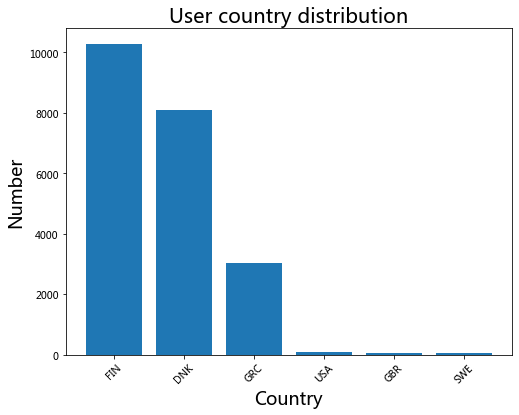

In [319]:
# Create a bar plot to show the number of users from each country.
plt.figure(figsize=(8, 6))
plt.xticks(rotation=45)
country_sort = country_cnt.sort_values(ascending=False).index[:6]
country_sort_cnt = country_cnt.sort_values(ascending=False).values[:6]
plt.xlabel("Country",fontsize=18)
plt.ylabel("Number",fontsize=18)
plt.title("User country distribution", fontsize=20)
plt.bar(country_sort, country_sort_cnt)
# plt.savefig('./pic/coutry_cnt.jpg')

In [279]:
# Total 21400 users from FIN DNK GRC, this 3 countries registrated in 2019-09.
data.REGISTRATION_COUNTRY.value_counts()[:3].values.sum()

21400

In [315]:
data.REGISTRATION_COUNTRY.value_counts()[:3]

FIN    10277
DNK     8081
GRC     3042
Name: REGISTRATION_COUNTRY, dtype: int64

In [282]:
# The rest countries have only 583 users.
data.REGISTRATION_COUNTRY.value_counts()[3:].values.sum()

583

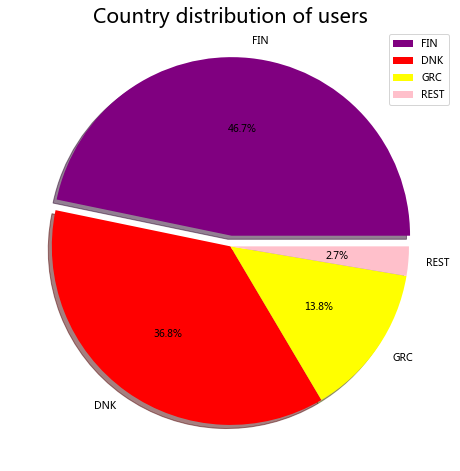

In [242]:
plt.figure(figsize=(8, 8))
total_num = sum(country_sort_cnt)
size = [i/total_num for i in country_sort_cnt]
size = [size[0], size[1], size[2], sum(size[3:])]
expodes = (0.06,0.0,0.,0.0)
plt.axis('equal')
labels = [country_sort[0], country_sort[1], country_sort[2], 'REST']
colors = ['purple', 'red', 'yellow', 'pink']
plt.title("Country distribution of users", fontsize=20)
plt.pie(size, labels=labels, shadow=True,autopct='%3.1f%%', explode=expodes, pctdistance=0.6, colors=colors)
plt.legend(labels=labels)
# plt.savefig('./pic/coutry_cnt_pai.jpg')
# plt.show()


# As can be seen from the pie chart, the top three countries with more users are FIN, DNK, GRC.
# And only 2.7% of users are from other countries in 2019-09.

In [322]:
# The number of No purchase users
data.PURCHASE_COUNT.value_counts()[0]

9955

In [324]:
# The number of purchased users
data.PURCHASE_COUNT.value_counts()[1:].sum()

12028

([<matplotlib.patches.Wedge at 0x7f7da0c3d1d0>,
 [Text(0.17119887972073056, 1.1472972341910213, 'No purchase'),
  Text(-0.1623437652524171, -1.0879542738018304, 'Purchased')],
 [Text(0.09740625915145015, 0.6527725642810982, '45.3%'),
  Text(-0.08855114468313659, -0.5934296038919075, '54.7%')])

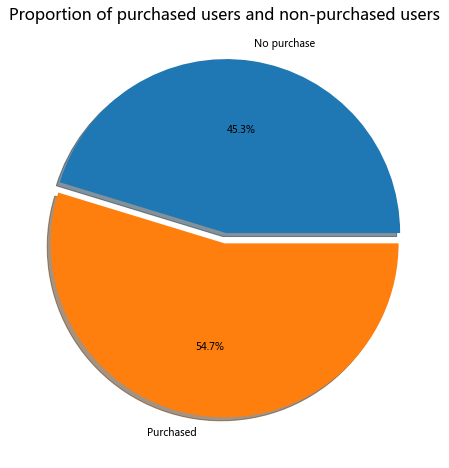

In [320]:
# Create a pie chart to show the proportion of purchased users and non-purchased users.
plt.figure(figsize=(8, 8))
purchase_count_list = [data.PURCHASE_COUNT.value_counts()[0],data.PURCHASE_COUNT.value_counts()[1:].sum()]
label = ["No purchase","Purchased"]
plt.title("Proportion of purchased users and non-purchased users", fontsize=16)
plt.pie(purchase_count_list, labels=label, autopct='%3.1f%%',pctdistance=0.6, shadow=True,explode=(0.06,0) )
# plt.legend(labels=label)

# There are 54.7% of users has at least one purchase, and 45.3% of users have no purchase. 


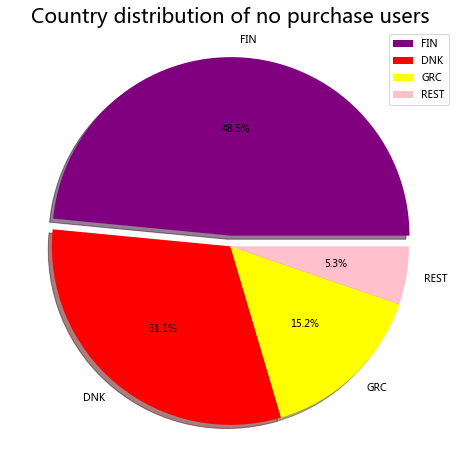

In [241]:
# Create a pie chart to show the country distribution of no purchase users.
plt.figure(figsize=(8, 8))
no_purchase_country_count=data[data.PURCHASE_COUNT==0].REGISTRATION_COUNTRY.value_counts()
no_purchase_list = [no_purchase_country_count.values[0], 
                    no_purchase_country_count.values[1], 
                    no_purchase_country_count.values[2], 
                    sum(no_purchase_country_count.values[3:])]
expodes = (0.06,0.0,0.,0.0)
plt.axis('equal')
labels = [no_purchase_country_count.index[0], 
          no_purchase_country_count.index[1], 
          no_purchase_country_count.index[2], 
          'REST']
colors = ['purple', 'red', 'yellow', 'pink']
plt.title("Country distribution of no purchase users", fontsize=20)
plt.pie(no_purchase_list, labels=labels, shadow=True,autopct='%3.1f%%', explode=expodes, pctdistance=0.6, colors=colors)
plt.legend(labels=labels)


# FIN, DNK, GRC also have the most non-purchase users.


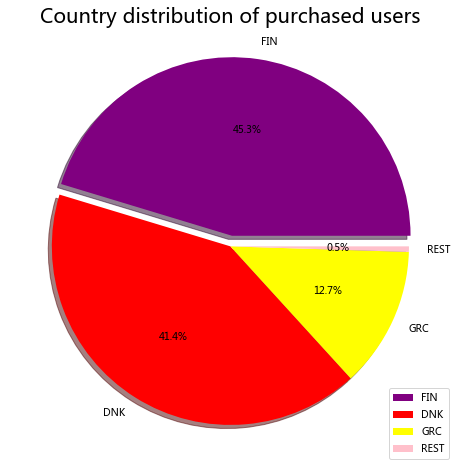

In [243]:
# Create a pie chart to show the country distribution of purchased users.
plt.figure(figsize=(8, 8))
purchase_country_count=data[data.PURCHASE_COUNT>0].REGISTRATION_COUNTRY.value_counts()
purchase_list = [purchase_country_count.values[0], 
                 purchase_country_count.values[1], 
                 purchase_country_count.values[2], 
                 sum(purchase_country_count.values[3:])]
expodes = (0.06,0.0,0.,0.0)
plt.axis('equal')
labels = [purchase_country_count.index[0], 
          purchase_country_count.index[1], 
          purchase_country_count.index[2], 
          'REST']
colors = ['purple', 'red', 'yellow', 'pink']
plt.title("Country distribution of purchased users", fontsize=20)
plt.pie(purchase_list, labels=labels, shadow=True,autopct='%3.1f%%', explode=expodes, pctdistance=0.6, colors=colors)
plt.legend(labels=labels)

# FIN, DNK, GRC also have the most purchased users.



In [328]:
purchase_country_count=data[data.PURCHASE_COUNT>0].REGISTRATION_COUNTRY.value_counts()
purchase_country_count

FIN    5451
DNK    4985
GRC    1532
NOR      13
EST      13
HUN       5
SWE       4
POL       4
CZE       4
LVA       3
ISR       3
FRA       2
GBR       2
LTU       2
CAN       1
CYP       1
ARE       1
DEU       1
HRV       1
Name: REGISTRATION_COUNTRY, dtype: int64

<BarContainer object of 19 artists>

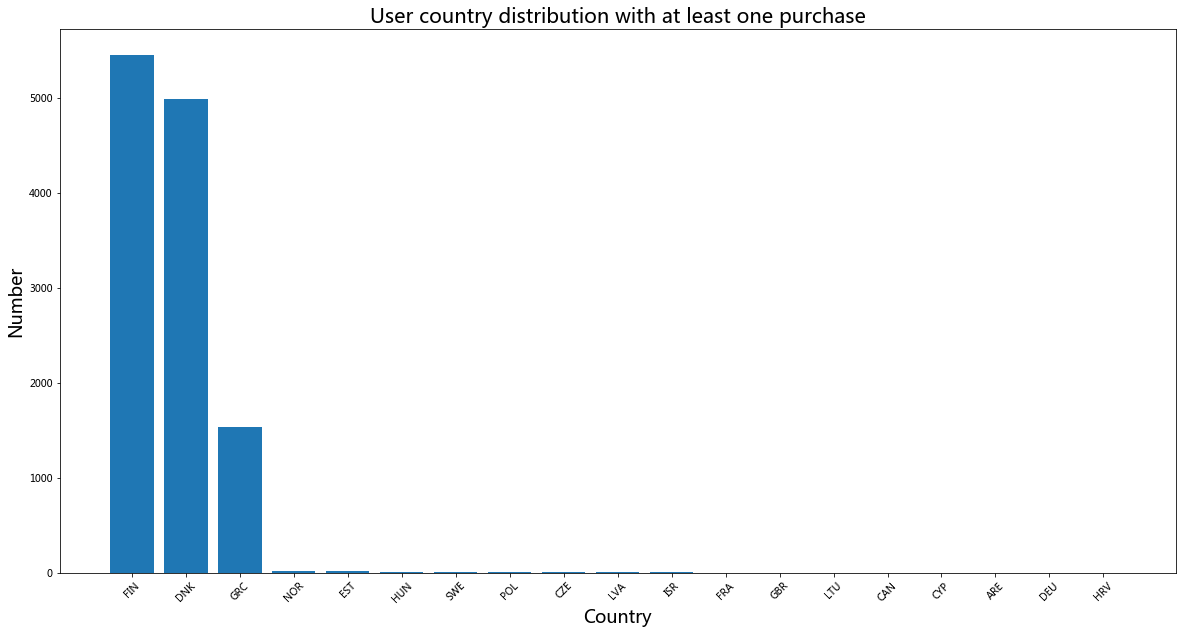

In [300]:
# Create a bar plot to show the number of users who have at least one purchase from each country.
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)

plt.xlabel("Country",fontsize=18)
plt.ylabel("Number",fontsize=18)
plt.title("User country distribution with at least one purchase", fontsize=20)
plt.bar(purchase_country_count.index, purchase_country_count.values)


In [297]:
purchase_country_count

FIN    5451
DNK    4985
GRC    1532
NOR      13
EST      13
HUN       5
SWE       4
POL       4
CZE       4
LVA       3
ISR       3
FRA       2
GBR       2
LTU       2
CAN       1
CYP       1
ARE       1
DEU       1
HRV       1
Name: REGISTRATION_COUNTRY, dtype: int64

## 2.2 How many orders have they made by 2020.10. In which countries do users have the highest total sales? Which countries have the highest average order price per user?


In [333]:
print ("A total of",data.PURCHASE_COUNT.sum(),
      "orders have been made by users who registered in September 2019 and were made until October 2020.")

A total of 73541 orders have been made by users who registered in September 2019 and were made until October 2020.


In [340]:
orders_by_country=data.groupby("REGISTRATION_COUNTRY").PURCHASE_COUNT.sum().sort_values(ascending=False)
orders_by_country[:3]

# Among all users who registered in September 2019, users from Finland made the most orders (until 2020-10), 
# with a total number of 34,634.

REGISTRATION_COUNTRY
FIN    34634
DNK    28222
GRC    10380
Name: PURCHASE_COUNT, dtype: int64

In [490]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64
 5   FIRST_PURCHASE_DAY                       11964 non-null  object 
 6   LAST_PURCHASE_DAY                        12027 non-null  object 
 7   USER_ID                                  21983 non-null  int64  
 8   BREAKFAST_PURCHASES                      12028 non-null  float64
 9   LUNCH_PURCHASES                          12028 non-null  float64
 10  EVENING_PURCHASES                        12028

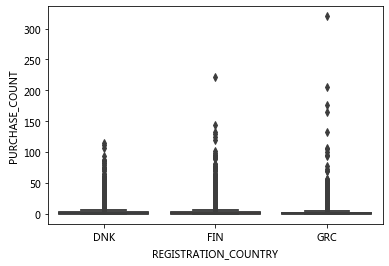

In [496]:
# mean, max, min, median of PURCHASE_COUNT by REGISTRATION_COUNTRY showed in box plot 
# there are outliers 
data_top3 = data.loc[data.REGISTRATION_COUNTRY.isin(["FIN","DNK","GRC"])]
sns.boxplot(x = 'REGISTRATION_COUNTRY', y = "PURCHASE_COUNT", data = data_top3, orient = 'v')
sns.boxplot(x = 'REGISTRATION_COUNTRY', y = "PURCHASE_COUNT", data = data_top3, orient = 'v',showfliers=False)

<BarContainer object of 3 artists>

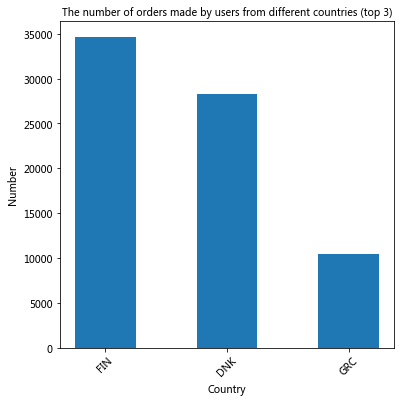

In [353]:
# Create a bar plot to show the number of orders made by users from different countries (top 3).
plt.figure(figsize=(6, 6))
plt.xticks(rotation=45)

plt.xlabel("Country",fontsize=10)
plt.ylabel("Number",fontsize=10)
plt.title("The number of orders made by users from different countries (top 3)", fontsize=10)
plt.bar(orders_by_country[:3].index, orders_by_country[:3].values,width=0.5)


In [354]:

print (data.groupby("REGISTRATION_COUNTRY").PURCHASE_COUNT.mean().sort_values(ascending=False)[:4])

# Among all users who registered in September 2019, users from LVA have the most average number of puchases, 
# but only have 7 users who made total 41 puchases. 


REGISTRATION_COUNTRY
LVA    5.857143
DNK    3.492390
GRC    3.412229
FIN    3.370050
Name: PURCHASE_COUNT, dtype: float64


In [374]:
# Total sales by country

data["TOTAL_SALES"]=data.PURCHASE_COUNT*data.AVG_PURCHASE_VALUE_EUR
data.groupby("REGISTRATION_COUNTRY").TOTAL_SALES.sum().sort_values(ascending=False)[:3]

REGISTRATION_COUNTRY
DNK    1028685.856
FIN     933622.624
GRC     149749.688
Name: TOTAL_SALES, dtype: float64

In [616]:
data.groupby("REGISTRATION_COUNTRY").TOTAL_PURCHASES_EUR.sum().sort_values(ascending=False)[:3]

REGISTRATION_COUNTRY
DNK    1028537.092
FIN     933584.168
GRC     150036.084
Name: TOTAL_PURCHASES_EUR, dtype: float64

In [411]:
# The total sales made by the users registered in September 2019 until October 2020 is 2,119,327.364 euros.
data.TOTAL_SALES.sum()

2119327.364

In [613]:
data.TOTAL_PURCHASES_EUR.sum()

2119458.9239999996

In [614]:
# why there is a difference of 131.55999999959022 ? 

data.TOTAL_PURCHASES_EUR.sum()-data.TOTAL_SALES.sum()

131.55999999959022

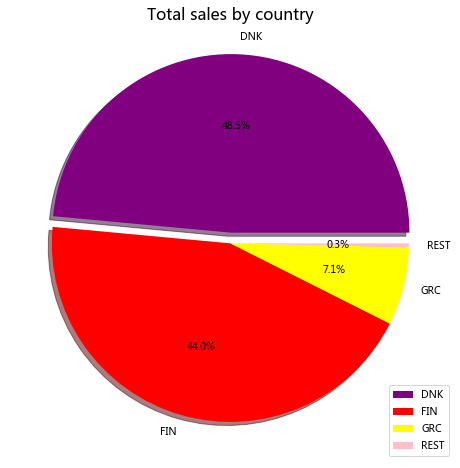

In [615]:
# Create a pie chart to show Total sales by country.
plt.figure(figsize=(8, 8))
total_sales = data.groupby("REGISTRATION_COUNTRY").TOTAL_PURCHASES_EUR.sum().sort_values(ascending=False)
sales_list = [total_sales.values[0], 
                 total_sales.values[1], 
                 total_sales.values[2], 
                 sum(total_sales.values[3:])]
expodes = (0.06,0.0,0.,0.0)
plt.axis('equal')
labels = [total_sales.index[0], 
          total_sales.index[1], 
          total_sales.index[2], 
          'REST']
colors = ['purple', 'red', 'yellow', 'pink']
plt.title("Total sales by country", fontsize=16)
plt.pie(sales_list, labels=labels, shadow=True,autopct='%3.1f%%', explode=expodes, pctdistance=0.6, colors=colors)
plt.legend(labels=labels)

# 


In [419]:
# average order value by country (FIN,DNK,GRC)

aov_fin=data.groupby("REGISTRATION_COUNTRY").TOTAL_SALES.sum().loc["FIN"]/data.groupby("REGISTRATION_COUNTRY").PURCHASE_COUNT.sum().loc["FIN"]
aov_dnk=data.groupby("REGISTRATION_COUNTRY").TOTAL_SALES.sum().loc["DNK"]/data.groupby("REGISTRATION_COUNTRY").PURCHASE_COUNT.sum().loc["DNK"]
aov_grc=data.groupby("REGISTRATION_COUNTRY").TOTAL_SALES.sum().loc["GRC"]/data.groupby("REGISTRATION_COUNTRY").PURCHASE_COUNT.sum().loc["GRC"]

print ("Average order value for FIN is:","%.2f"%aov_fin,"euros.")
print ("Average order value for DNK is:","%.2f"%aov_dnk,"euros.")
print ("Average order value for GRC is:","%.2f"%aov_grc,"euros.")


Average order value for FIN is: 26.96 euros.
Average order value for DNK is: 36.45 euros.
Average order value for GRC is: 14.43 euros.


<BarContainer object of 3 artists>

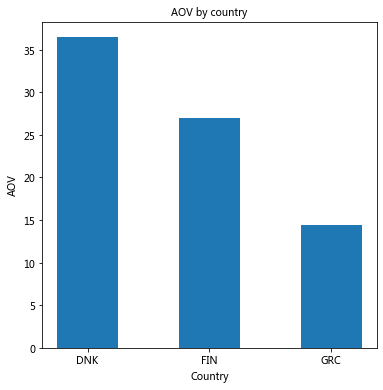

In [432]:
# Create a bar plot to show the number of AOV by the 3 main countries.
plt.figure(figsize=(6, 6))

# plt.xticks(rotation=45)

plt.xlabel("Country",fontsize=10)
plt.ylabel("AOV",fontsize=10)
plt.title("AOV by country", fontsize=10)
plt.bar(["DNK","FIN","GRC"], [aov_dnk,aov_fin,aov_grc],width=0.5, align='center')


In [427]:
print (["%.2f"%aov_dnk,"%.2f"%aov_fin,"%.2f"%aov_grc])

['36.45', '26.96', '14.43']


In [287]:
print ("Among all users who registered in September 2019 with at least one purchase, The average number of puchases is", 
        data[data.PURCHASE_COUNT>0].PURCHASE_COUNT.mean())


Among all users who registered in September 2019 with at least one purchase, The average number of puchases is 6.114150315929498


In [294]:
print (data[data.PURCHASE_COUNT>0].groupby("REGISTRATION_COUNTRY").PURCHASE_COUNT.mean().sort_values(ascending=False))
print (data[data.PURCHASE_COUNT>0].REGISTRATION_COUNTRY.value_counts())

# Among all users who registered in September 2019 with at least one purchase, 
# users from LVA has the highest average number of purchases 
# although the number users from LVA with at least one purchase is 3.


REGISTRATION_COUNTRY
LVA    13.666667
LTU    12.000000
CZE    11.500000
GBR     8.500000
GRC     6.775457
EST     6.538462
FIN     6.353697
HRV     6.000000
DNK     5.661384
ISR     5.333333
CAN     5.000000
CYP     3.000000
HUN     2.400000
NOR     2.230769
ARE     2.000000
DEU     2.000000
POL     2.000000
FRA     1.500000
SWE     1.500000
Name: PURCHASE_COUNT, dtype: float64
FIN    5451
DNK    4985
GRC    1532
NOR      13
EST      13
HUN       5
SWE       4
POL       4
CZE       4
LVA       3
ISR       3
FRA       2
GBR       2
LTU       2
CAN       1
CYP       1
ARE       1
DEU       1
HRV       1
Name: REGISTRATION_COUNTRY, dtype: int64


In [256]:
print (data.PURCHASE_COUNT_DELIVERY.sum())
print (data.PURCHASE_COUNT_TAKEAWAY.sum())
# There are much more delivery purchases.

69061.0
4480.0


<BarContainer object of 2 artists>

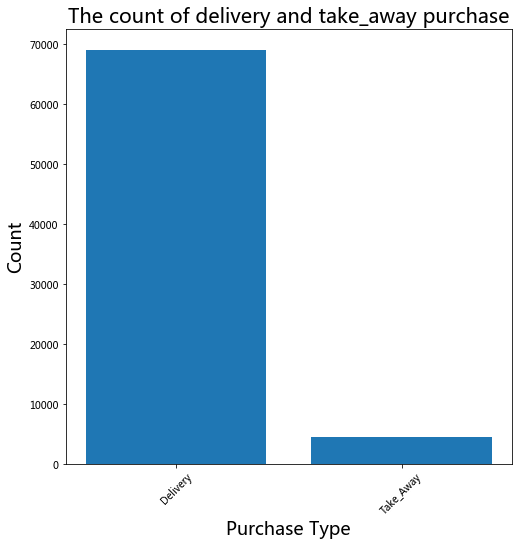

In [257]:
# Create a bar plot to show the count of delivery and take_away purchase.
plt.figure(figsize=(8,8))
plt.xticks(rotation=45)

plt.xlabel("Purchase Type",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("The count of delivery and take_away purchase", fontsize=20)
plt.bar(["Delivery","Take_Away"], [data.PURCHASE_COUNT_DELIVERY.sum(),data.PURCHASE_COUNT_TAKEAWAY.sum()])


In [436]:
# IOS_PURCHASES                            
# WEB_PURCHASES                            
# ANDROID_PURCHASES

# total orders made by IOS
data.IOS_PURCHASES.sum()


34887.0

In [437]:
# total orders made by WEB

data.WEB_PURCHASES.sum()

12708.0

In [438]:
# total orders made by ANDROID

data.ANDROID_PURCHASES.sum()

25946.0

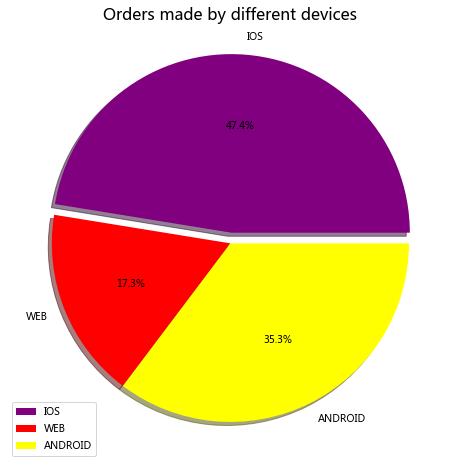

In [446]:
# Create a pie chart to show # Create a pie chart to show orders by devices.
plt.figure(figsize=(8, 8))

device_list = [data.IOS_PURCHASES.sum(), 
                data.WEB_PURCHASES.sum(), 
                 data.ANDROID_PURCHASES.sum()]
expodes = (0.06,0.0,0.0)
plt.axis('equal')
labels = ["IOS","WEB","ANDROID"]
colors = ['purple', 'red', 'yellow']
plt.title("Orders made by different devices", fontsize=16)
plt.pie(device_list, labels=labels, shadow=True,autopct='%3.1f%%', explode=expodes, pctdistance=0.6, colors=colors)
plt.legend(labels=labels)

# 


In [442]:
# IOS_PURCHASES by country
data.groupby("REGISTRATION_COUNTRY").IOS_PURCHASES.sum().sort_values(ascending=False)[:3]

REGISTRATION_COUNTRY
DNK    16699.0
FIN    13296.0
GRC     4706.0
Name: IOS_PURCHASES, dtype: float64

In [443]:
# WEB_PURCHASES by country
data.groupby("REGISTRATION_COUNTRY").WEB_PURCHASES.sum().sort_values(ascending=False)[:3]

REGISTRATION_COUNTRY
DNK    6546.0
FIN    4461.0
GRC    1685.0
Name: WEB_PURCHASES, dtype: float64

In [444]:
# ANDROID_PURCHASES by country
data.groupby("REGISTRATION_COUNTRY").ANDROID_PURCHASES.sum().sort_values(ascending=False)[:3]

REGISTRATION_COUNTRY
FIN    16877.0
DNK     4977.0
GRC     3989.0
Name: ANDROID_PURCHASES, dtype: float64

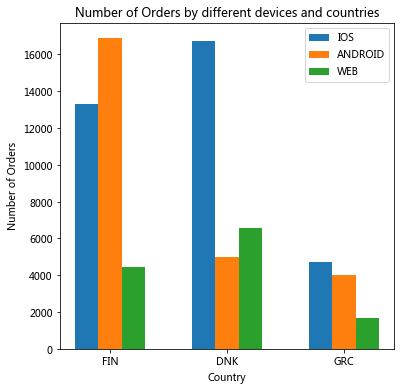

In [868]:
# Create a bar chart to show orders that made by different devices by REGISTRATION_COUNTRY (top 3)

plt.figure(figsize=(6, 6))

X = ['FIN','DNK','GRC']
ios = [13296.0,16699.0,4706.0]
android = [16877.0,4977.0,3989.0]
web = [4461.0,6546.0,1685.0]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, ios, 0.2, label = 'IOS')
plt.bar(X_axis, android, 0.2, label = 'ANDROID')
plt.bar(X_axis + 0.2, web, 0.2, label = 'WEB')

  
plt.xticks(X_axis, X)
plt.xlabel("Country")
plt.ylabel("Number of Orders")
plt.title("Number of Orders by different devices and countries")
plt.legend()
plt.show()


In [513]:
# 5017 Users only used IOS to make orders. 
data.loc[(data.IOS_PURCHASES == data.PURCHASE_COUNT) & (data.PURCHASE_COUNT !=0)]

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE,TOTAL_SALES
12,2019-09-01 00:00:00.000,FIN,19,19.0,0.0,2020-04-18 00:00:00.000,2020-10-27 00:00:00.000,13,0.0,8.0,...,0.0,NaN,True,7.0,3.0,11.0,9.0,3.303,"{\n ""General merchandise"": 1,\n ""Grocery"": 9...",596.068
15,2019-09-01 00:00:00.000,FIN,2,2.0,0.0,2020-05-18 00:00:00.000,2020-07-06 00:00:00.000,16,0.0,2.0,...,0.0,NaN,False,0.0,1.0,49.0,49.0,4.619,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",107.272
17,2019-09-01 00:00:00.000,DNK,2,2.0,0.0,2019-09-05 00:00:00.000,2020-05-16 00:00:00.000,18,0.0,0.0,...,0.0,"[\n ""japanese""\n]",True,7.0,2.0,254.0,254.0,8.324,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",115.368
20,2019-09-01 00:00:00.000,GRC,3,3.0,0.0,2020-04-26 00:00:00.000,2020-05-28 00:00:00.000,21,0.0,1.0,...,0.0,NaN,True,2.0,7.0,16.0,16.0,2.956,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",24.288
22,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-10-24 00:00:00.000,2020-10-24 00:00:00.000,23,0.0,0.0,...,0.0,NaN,True,7.0,5.0,NaN,NaN,9.408,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",25.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21956,2019-09-30 00:00:00.000,FIN,5,5.0,0.0,2019-10-01 00:00:00.000,2020-05-11 00:00:00.000,21957,0.0,2.0,...,0.0,NaN,False,17.0,2.0,56.0,46.0,0.192,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",96.140
21957,2019-09-30 00:00:00.000,GRC,1,1.0,0.0,2020-03-05 00:00:00.000,2020-03-05 00:00:00.000,21958,0.0,0.0,...,0.0,NaN,True,6.0,7.0,NaN,NaN,10.998,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",7.084
21966,2019-09-30 00:00:00.000,DNK,2,2.0,0.0,2020-07-17 00:00:00.000,2020-08-03 00:00:00.000,21967,0.0,2.0,...,0.0,NaN,False,0.0,7.0,17.0,17.0,2.281,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",95.128
21970,2019-09-30 00:00:00.000,DNK,1,1.0,0.0,2019-10-13 00:00:00.000,2019-10-13 00:00:00.000,21971,0.0,0.0,...,0.0,NaN,False,23.0,2.0,NaN,NaN,3.916,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",62.744


In [514]:
# 3765 Users only used ANDROID to make orders. 

data.loc[(data.ANDROID_PURCHASES == data.PURCHASE_COUNT) & (data.PURCHASE_COUNT !=0)]

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE,TOTAL_SALES
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",38.456
7,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-10-14 00:00:00.000,2020-10-14 00:00:00.000,8,0.0,0.0,...,1.0,NaN,True,5.0,1.0,NaN,NaN,1.251,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",19.228
13,2019-09-01 00:00:00.000,FIN,2,2.0,0.0,2020-08-21 00:00:00.000,2020-09-09 00:00:00.000,14,0.0,1.0,...,2.0,"[\n ""american""\n]",False,5.0,6.0,19.0,19.0,1.382,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",119.416
16,2019-09-01 00:00:00.000,FIN,7,5.0,2.0,2019-12-05 00:00:00.000,2020-10-31 00:00:00.000,17,0.0,5.0,...,7.0,"[\n ""american""\n]",True,10.0,1.0,55.0,56.0,4.903,"{\n ""General merchandise"": 1,\n ""Grocery"": 3...",283.360
21,2019-09-01 00:00:00.000,FIN,4,4.0,0.0,2019-10-27 00:00:00.000,2020-07-08 00:00:00.000,22,0.0,0.0,...,4.0,NaN,True,1.0,1.0,85.0,96.0,1.609,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",109.296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21971,2019-09-30 00:00:00.000,GRC,25,25.0,0.0,2019-10-06 00:00:00.000,2020-10-22 00:00:00.000,21972,0.0,6.0,...,25.0,NaN,True,11.0,5.0,16.0,9.0,2.753,"{\n ""General merchandise"": 1,\n ""Grocery"": 1...",253.000
21973,2019-09-30 00:00:00.000,FIN,1,1.0,0.0,2020-10-15 00:00:00.000,2020-10-15 00:00:00.000,21974,0.0,0.0,...,1.0,NaN,False,19.0,6.0,NaN,NaN,4.045,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",26.312
21975,2019-09-30 00:00:00.000,GRC,4,4.0,0.0,2020-04-11 00:00:00.000,2020-04-27 00:00:00.000,21976,2.0,2.0,...,4.0,NaN,True,12.0,5.0,5.0,5.0,11.540,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",24.288
21976,2019-09-30 00:00:00.000,DNK,1,1.0,0.0,2019-10-03 00:00:00.000,2019-10-03 00:00:00.000,21977,0.0,0.0,...,1.0,NaN,False,22.0,1.0,NaN,NaN,2.365,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",56.672


In [515]:
# 1904 Users only used WEB to make orders. 
data.loc[(data.WEB_PURCHASES == data.PURCHASE_COUNT) & (data.PURCHASE_COUNT !=0)]

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE,TOTAL_SALES
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9...",634.524
45,2019-09-01 00:00:00.000,DNK,1,1.0,0.0,2019-11-05 00:00:00.000,2019-11-05 00:00:00.000,46,0.0,1.0,...,0.0,NaN,True,23.0,6.0,NaN,NaN,8.617,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",55.660
48,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2019-09-01 00:00:00.000,2019-09-01 00:00:00.000,49,1.0,0.0,...,0.0,NaN,True,20.0,7.0,NaN,NaN,7.357,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",26.312
74,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-01-03 00:00:00.000,2020-01-03 00:00:00.000,75,0.0,0.0,...,0.0,NaN,True,20.0,6.0,NaN,NaN,1.881,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",41.492
103,2019-09-01 00:00:00.000,FIN,14,13.0,1.0,2019-10-18 00:00:00.000,2020-08-09 00:00:00.000,104,1.0,5.0,...,0.0,NaN,True,5.0,3.0,23.0,21.0,1.553,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",382.536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21904,2019-09-30 00:00:00.000,GRC,1,1.0,0.0,2019-09-30 00:00:00.000,2019-09-30 00:00:00.000,21905,0.0,0.0,...,0.0,NaN,True,6.0,7.0,NaN,NaN,8.513,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",26.312
21921,2019-09-30 00:00:00.000,DNK,2,2.0,0.0,2019-09-30 00:00:00.000,2019-10-01 00:00:00.000,21922,0.0,0.0,...,0.0,"[\n ""mexican""\n]",True,22.0,7.0,1.0,1.0,1.750,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",52.624
21922,2019-09-30 00:00:00.000,FIN,1,1.0,0.0,2019-10-01 00:00:00.000,2019-10-01 00:00:00.000,21923,0.0,0.0,...,0.0,NaN,True,14.0,7.0,NaN,NaN,1.576,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",277.288
21944,2019-09-30 00:00:00.000,DNK,1,1.0,0.0,2020-10-01 00:00:00.000,2020-10-01 00:00:00.000,21945,0.0,0.0,...,0.0,NaN,True,7.0,2.0,NaN,NaN,11.894,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",47.564


In [516]:
1904+3765+5017

10686

In [545]:
# 10686 USERS only use one device to make orders. (ONLY IOS, ONLY ANDROID, AND ONLY WEB)

data.loc[(data.PURCHASE_COUNT !=0) & ((data.IOS_PURCHASES==data.PURCHASE_COUNT) |(data.ANDROID_PURCHASES==data.PURCHASE_COUNT)|(data.WEB_PURCHASES==data.PURCHASE_COUNT) )]


,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE,TOTAL_SALES
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",38.456
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9...",634.524
7,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-10-14 00:00:00.000,2020-10-14 00:00:00.000,8,0.0,0.0,...,1.0,NaN,True,5.0,1.0,NaN,NaN,1.251,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",19.228
12,2019-09-01 00:00:00.000,FIN,19,19.0,0.0,2020-04-18 00:00:00.000,2020-10-27 00:00:00.000,13,0.0,8.0,...,0.0,NaN,True,7.0,3.0,11.0,9.0,3.303,"{\n ""General merchandise"": 1,\n ""Grocery"": 9...",596.068
13,2019-09-01 00:00:00.000,FIN,2,2.0,0.0,2020-08-21 00:00:00.000,2020-09-09 00:00:00.000,14,0.0,1.0,...,2.0,"[\n ""american""\n]",False,5.0,6.0,19.0,19.0,1.382,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",119.416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21973,2019-09-30 00:00:00.000,FIN,1,1.0,0.0,2020-10-15 00:00:00.000,2020-10-15 00:00:00.000,21974,0.0,0.0,...,1.0,NaN,False,19.0,6.0,NaN,NaN,4.045,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",26.312
21975,2019-09-30 00:00:00.000,GRC,4,4.0,0.0,2020-04-11 00:00:00.000,2020-04-27 00:00:00.000,21976,2.0,2.0,...,4.0,NaN,True,12.0,5.0,5.0,5.0,11.540,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",24.288
21976,2019-09-30 00:00:00.000,DNK,1,1.0,0.0,2019-10-03 00:00:00.000,2019-10-03 00:00:00.000,21977,0.0,0.0,...,1.0,NaN,False,22.0,1.0,NaN,NaN,2.365,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",56.672
21978,2019-09-30 00:00:00.000,GRC,1,1.0,0.0,2020-01-23 00:00:00.000,2020-01-23 00:00:00.000,21979,0.0,0.0,...,1.0,NaN,False,12.0,2.0,NaN,NaN,1.383,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",26.312


In [517]:
# 1342 users use more than 1 devices to make orders.

12028-10686


1342

In [554]:
# Confirm that 1342 users use more than 1 devices to make orders.


filter = ((data.PURCHASE_COUNT !=0) & ((data.IOS_PURCHASES==data.PURCHASE_COUNT) |(data.ANDROID_PURCHASES==data.PURCHASE_COUNT)|(data.WEB_PURCHASES==data.PURCHASE_COUNT) ))

data.loc[(~filter) & (data.PURCHASE_COUNT !=0) ]



,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE,TOTAL_SALES
27,2019-09-01 00:00:00.000,FIN,3,3.0,0.0,2020-02-02 00:00:00.000,2020-10-31 00:00:00.000,28,0.0,2.0,...,2.0,NaN,True,6.0,5.0,136.0,136.0,2.390,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",81.972
57,2019-09-01 00:00:00.000,GRC,4,4.0,0.0,2020-01-08 00:00:00.000,2020-06-16 00:00:00.000,58,0.0,4.0,...,2.0,NaN,True,11.0,7.0,53.0,35.0,1.836,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",32.384
65,2019-09-01 00:00:00.000,FIN,8,8.0,0.0,2019-11-16 00:00:00.000,2020-10-25 00:00:00.000,66,0.0,2.0,...,4.0,"[\n ""middle eastern""\n]",False,12.0,4.0,49.0,34.0,9.940,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",275.264
79,2019-09-01 00:00:00.000,GRC,320,320.0,0.0,2019-09-01 00:00:00.000,2020-02-29 00:00:00.000,80,37.0,171.0,...,124.0,NaN,True,3.0,4.0,1.0,1.0,4.407,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",4209.920
93,2019-09-01 00:00:00.000,FIN,8,8.0,0.0,2019-09-08 00:00:00.000,2020-07-27 00:00:00.000,94,0.0,4.0,...,5.0,NaN,False,8.0,4.0,46.0,49.0,7.973,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",388.608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21881,2019-09-30 00:00:00.000,DNK,6,6.0,0.0,2019-09-30 00:00:00.000,2020-04-14 00:00:00.000,21882,0.0,0.0,...,0.0,"[\n ""american""\n]",True,15.0,7.0,39.0,37.0,7.444,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",182.160
21889,2019-09-30 00:00:00.000,DNK,6,4.0,2.0,2019-09-30 00:00:00.000,2020-10-25 00:00:00.000,21890,0.0,4.0,...,0.0,NaN,True,18.0,4.0,78.0,80.0,9.969,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",206.448
21899,2019-09-30 00:00:00.000,DNK,21,21.0,0.0,2019-09-30 00:00:00.000,2020-09-19 00:00:00.000,21900,0.0,6.0,...,0.0,"[\n ""american""\n]",True,5.0,3.0,18.0,8.0,6.910,"{\n ""General merchandise"": 1,\n ""Grocery"": 1...",807.576
21926,2019-09-30 00:00:00.000,GRC,7,7.0,0.0,2019-09-30 00:00:00.000,2020-04-01 00:00:00.000,21927,0.0,0.0,...,6.0,NaN,True,13.0,4.0,31.0,22.0,10.331,"{\n ""General merchandise"": 1,\n ""Grocery"": 3...",56.672


In [533]:
# 913 users have placed orders with both ios and other devices.
data.loc[(data.IOS_PURCHASES != data.PURCHASE_COUNT)& (data.PURCHASE_COUNT !=0)&(data.IOS_PURCHASES!=0)][["PURCHASE_COUNT","IOS_PURCHASES","WEB_PURCHASES","ANDROID_PURCHASES"]]

,PURCHASE_COUNT,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES
27,3,1.0,0.0,2.0
65,8,4.0,0.0,4.0
93,8,3.0,0.0,5.0
106,6,5.0,1.0,0.0
126,21,20.0,1.0,0.0
...,...,...,...,...
21865,2,1.0,1.0,0.0
21881,6,3.0,3.0,0.0
21889,6,3.0,3.0,0.0
21899,21,3.0,18.0,0.0


In [539]:

# 5017 Users only used IOS to make orders. And their average AVG_PURCHASE_VALUE_EUR is 31.27 EURO.
data.loc[(data.IOS_PURCHASES == data.PURCHASE_COUNT) & (data.PURCHASE_COUNT !=0)].AVG_PURCHASE_VALUE_EUR.mean()

31.274370340840914

In [540]:
# 3765 Users only used ANDROID to make orders. And their average AVG_PURCHASE_VALUE_EUR is 26.96 EURO.

data.loc[(data.ANDROID_PURCHASES == data.PURCHASE_COUNT) & (data.PURCHASE_COUNT !=0)].AVG_PURCHASE_VALUE_EUR.mean()

26.96328180610875

In [542]:
# 1904 Users only used WEB to make orders. And their average AVG_PURCHASE_VALUE_EUR is 38.25 EURO.
data.loc[(data.WEB_PURCHASES == data.PURCHASE_COUNT) & (data.PURCHASE_COUNT !=0)].AVG_PURCHASE_VALUE_EUR.mean()

38.25402521008422

In [555]:
# 1342 users use more than 1 devices to make orders. And their average AVG_PURCHASE_VALUE_EUR is 32.76 EURO.
data.loc[(~filter) & (data.PURCHASE_COUNT !=0) ].AVG_PURCHASE_VALUE_EUR.mean()

32.75577049180339

<BarContainer object of 4 artists>

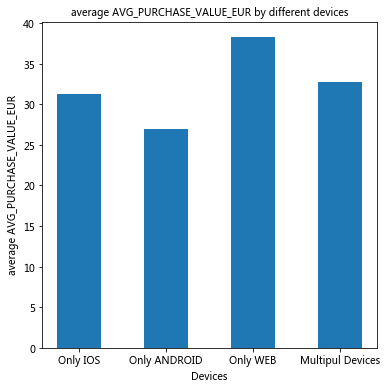

In [562]:
# Create a bar plot to show the average AVG_PURCHASE_VALUE_EUR by different devices.
plt.figure(figsize=(6, 6))

# plt.xticks(rotation=45)

plt.xlabel("Devices",fontsize=10)
plt.ylabel("average AVG_PURCHASE_VALUE_EUR",fontsize=10)
plt.title("average AVG_PURCHASE_VALUE_EUR by different devices", fontsize=10)
plt.bar(["Only IOS","Only ANDROID","Only WEB","Multipul Devices"], 
        [data.loc[(data.IOS_PURCHASES == data.PURCHASE_COUNT) & (data.PURCHASE_COUNT !=0)].AVG_PURCHASE_VALUE_EUR.mean()
         ,data.loc[(data.ANDROID_PURCHASES == data.PURCHASE_COUNT) & (data.PURCHASE_COUNT !=0)].AVG_PURCHASE_VALUE_EUR.mean()
         ,data.loc[(data.WEB_PURCHASES == data.PURCHASE_COUNT) & (data.PURCHASE_COUNT !=0)].AVG_PURCHASE_VALUE_EUR.mean(),
        data.loc[(~filter) & (data.PURCHASE_COUNT !=0) ].AVG_PURCHASE_VALUE_EUR.mean()],width=0.5, align='center')


# WEB has the largest average AVG_PURCHASE_VALUE_EUR, although the number of its users is relatively small. 
# IOS has the most users, and the average AVG_PURCHASE_VALUE_EUR is relatively high. 


## 3. From the pespective of a manager who in charge of Finnish market.


In [784]:
fin = data[data.REGISTRATION_COUNTRY=="FIN"]
fin.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE,TOTAL_SALES
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",38.456
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",NaN
5,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,6,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",NaN
7,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-10-14 00:00:00.000,2020-10-14 00:00:00.000,8,0.0,0.0,...,1.0,NaN,True,5.0,1.0,NaN,NaN,1.251,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",19.228
8,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,9,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",NaN


In [785]:
fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10277 entries, 1 to 21973
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        10277 non-null  object 
 1   REGISTRATION_COUNTRY                     10277 non-null  object 
 2   PURCHASE_COUNT                           10277 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  5451 non-null   float64
 4   PURCHASE_COUNT_TAKEAWAY                  5451 non-null   float64
 5   FIRST_PURCHASE_DAY                       5436 non-null   object 
 6   LAST_PURCHASE_DAY                        5450 non-null   object 
 7   USER_ID                                  10277 non-null  int64  
 8   BREAKFAST_PURCHASES                      5451 non-null   float64
 9   LUNCH_PURCHASES                          5451 non-null   float64
 10  EVENING_PURCHASES                        5451 

## 3.1 How many Finnish users registered in 2019-09? Among them, how many people have placed an order, and what is the proportion of them?

In [572]:
print("There are",fin.shape[0],"Finnish users registered in 2019-09. \n")
print ("Among them,", (fin.PURCHASE_COUNT!=0).sum(),"users has placed at least one order.")


There are 10277 Finnish users registered in 2019-09. 

Among them, 5451 users has placed at least one order.


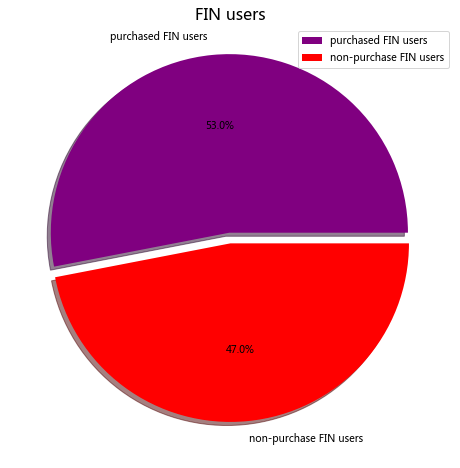

In [573]:
# Create a pie chart to show orders by devices.
plt.figure(figsize=(8, 8))

fin_list = [(fin.PURCHASE_COUNT!=0).sum(), 
                fin.shape[0]-(fin.PURCHASE_COUNT!=0).sum()]
expodes = (0.06,0.0)
plt.axis('equal')
labels = ["purchased FIN users ","non-purchase FIN users"]
colors = ['purple', 'red']
plt.title("FIN users", fontsize=16)
plt.pie(fin_list, labels=labels, shadow=True,autopct='%3.1f%%', explode=expodes, pctdistance=0.6, colors=colors)
plt.legend(labels=labels)

# general : 54.7% 
# FIN : 53%. 

# The proportion of FIN registrants who have purchased is 53%, which is slightly lower than the overall proportion.


In [646]:
fin.TOTAL_PURCHASES_EUR.sum()
# The total purchase value of fin registered users in 2019-09 during 2019-09-2020-10 is 933,584.17.
# and ranked 2nd in general, the 1st is DNK

933584.1680000001

## 3.2 What is the order status of FIN registered users for breakfast, lunch, evening, dinner, and late night?

In [578]:
# # 2019-09 Registered users in Finland placed a total of 34634 orders from 2019-09 to 2020-10
fin.PURCHASE_COUNT.sum()

34634

In [591]:
# 2019-09 Registered users in Finland placed a total of 1264 breakfast orders from 2019-09 to 2020-10
fin.BREAKFAST_PURCHASES.sum()

1264.0

In [592]:
# 2019-09 Registered users in Finland placed a total of 15925 lunch orders from 2019-09 to 2020-10
fin.LUNCH_PURCHASES.sum()

15915.0

In [595]:
# 2019-09 Registered users in Finland placed a total of 15925 evening orders from 2019-09 to 2020-10
fin.EVENING_PURCHASES.sum() 

2635.0

In [594]:
# 2019-09 Registered users in Finland placed a total of 14609 dinner orders from 2019-09 to 2020-10
fin.DINNER_PURCHASES.sum() 


14609.0

In [596]:
# 2019-09 Registered users in Finland placed a total of 0 late night orders from 2019-09 to 2020-10
fin.LATE_NIGHT_PURCHASES.sum() 


0.0

In [622]:
fin.LATE_NIGHT_PURCHASES.value_counts()

0.0    5451
Name: LATE_NIGHT_PURCHASES, dtype: int64

In [584]:
1264.0+15915.0+2635.0+14609.0

34423.0

In [687]:
print (34634-34423.0)
fin[fin.PURCHASE_COUNT!=0][["USER_ID","PURCHASE_COUNT","BREAKFAST_PURCHASES","LUNCH_PURCHASES","EVENING_PURCHASES","LATE_NIGHT_PURCHASES"]]

# Why is there a gap of 211 in the number of orders placed in the four independent times 
# compared with the total number of orders?

# Maybe there are missing data or incomplete data in the four independent times period.
# for example: user 13, 21957 and user 21970. 

211.0


,USER_ID,PURCHASE_COUNT,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,LATE_NIGHT_PURCHASES
1,2,1,0.0,1.0,0.0,0.0
7,8,1,0.0,0.0,1.0,0.0
12,13,19,0.0,8.0,0.0,0.0
13,14,2,0.0,1.0,1.0,0.0
15,16,2,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...
21941,21942,3,0.0,2.0,0.0,0.0
21956,21957,5,0.0,2.0,0.0,0.0
21969,21970,6,0.0,2.0,3.0,0.0
21972,21973,4,1.0,2.0,1.0,0.0


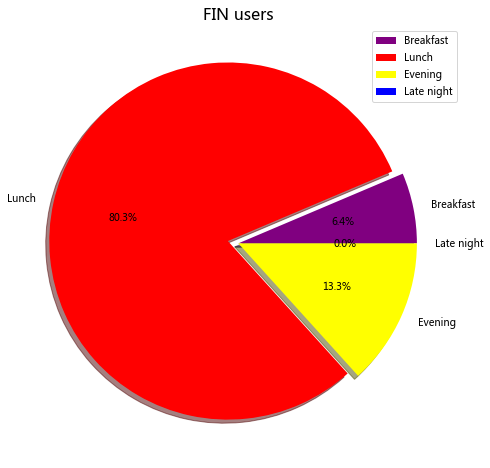

In [625]:
# Create a pie chart to orders of FIN users by different time period.
plt.figure(figsize=(8, 8))

time_list = [fin.BREAKFAST_PURCHASES.sum(), 
            fin.LUNCH_PURCHASES.sum(),
           fin.EVENING_PURCHASES.sum(),
           fin.LATE_NIGHT_PURCHASES.sum()]
expodes = (0.0,0.06,0.0,0.0)
plt.axis('equal')
labels = ["Breakfast","Lunch","Evening","Late night"]
colors = ['purple', 'red',"yellow","blue"]
plt.title("FIN users", fontsize=16)
plt.pie(time_list, labels=labels, shadow=True,autopct='%3.1f%%', explode=expodes, pctdistance=0.6, colors=colors)
plt.legend(labels=labels)

# general : 54.7% 
# FIN : 53%. 

# The proportion of FIN registrants who have purchased is 53%, which is slightly lower than the overall proportion.


## 3.3 Most common hours and days of FIN users place an order.

In [670]:
fin.MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE.value_counts()

18.0    260
2.0     251
1.0     250
19.0    243
10.0    242
23.0    240
4.0     237
14.0    234
8.0     232
7.0     230
12.0    228
20.0    227
11.0    224
5.0     223
13.0    223
0.0     222
17.0    222
21.0    217
22.0    216
9.0     212
3.0     207
16.0    207
15.0    202
6.0     202
Name: MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE, dtype: int64

In [669]:
fin.MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE

1        23.0
3         NaN
5         NaN
7         5.0
8         NaN
         ... 
21956    17.0
21965     NaN
21969     0.0
21972     4.0
21973    19.0
Name: MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE, Length: 10277, dtype: float64

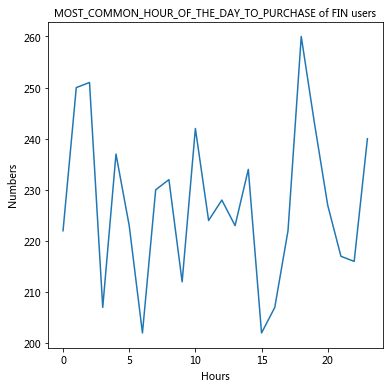

In [659]:
# Create a line plot to show the MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE of FIN users.
plt.figure(figsize=(6, 6))

# plt.xticks(rotation=45)

plt.xlabel("Hours",fontsize=10)
plt.ylabel("Numbers",fontsize=10)
plt.title("MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE of FIN users", fontsize=10)
plt.plot(list(fin.MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE.value_counts().sort_index().index), 
        list(fin.MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE.value_counts().sort_index().values))


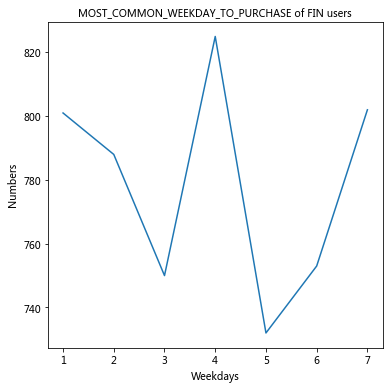

In [660]:
# Create a line plot to show the MOST_COMMON_WEEKDAY_TO_PURCHASE of FIN users.
plt.figure(figsize=(6, 6))

# plt.xticks(rotation=45)

plt.xlabel("Weekdays",fontsize=10)
plt.ylabel("Numbers",fontsize=10)
plt.title("MOST_COMMON_WEEKDAY_TO_PURCHASE of FIN users", fontsize=10)
plt.plot(list(fin.MOST_COMMON_WEEKDAY_TO_PURCHASE.value_counts().sort_index().index), 
        list(fin.MOST_COMMON_WEEKDAY_TO_PURCHASE.value_counts().sort_index().values))

# Friday has the lowest number of orders.
# Thursday has the highest number of orders.


In [671]:
fin.MOST_COMMON_WEEKDAY_TO_PURCHASE.value_counts()

4.0    825
7.0    802
1.0    801
2.0    788
6.0    753
3.0    750
5.0    732
Name: MOST_COMMON_WEEKDAY_TO_PURCHASE, dtype: int64

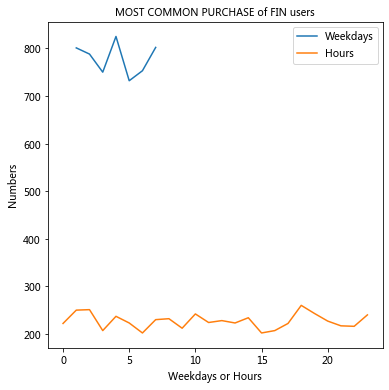

In [688]:
# Create a combine the two line plots to show the MOST_COMMON_WEEKDAY_TO_PURCHASE and HOURS of FIN users.
plt.figure(figsize=(6, 6))

# plt.xticks(rotation=45)

plt.xlabel("Weekdays or Hours",fontsize=10)
plt.ylabel("Numbers",fontsize=10)
plt.title("MOST COMMON PURCHASE of FIN users", fontsize=10)
plt.plot(list(fin.MOST_COMMON_WEEKDAY_TO_PURCHASE.value_counts().sort_index().index), 
        list(fin.MOST_COMMON_WEEKDAY_TO_PURCHASE.value_counts().sort_index().values),label = "Weekdays")
plt.plot(list(fin.MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE.value_counts().sort_index().index), 
        list(fin.MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE.value_counts().sort_index().values),label = "Hours")
plt.legend()



# 4.  From a perspective of Manager in charge of restaurant and store development in FIN.

In [636]:
fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10277 entries, 1 to 21973
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        10277 non-null  object 
 1   REGISTRATION_COUNTRY                     10277 non-null  object 
 2   PURCHASE_COUNT                           10277 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  5451 non-null   float64
 4   PURCHASE_COUNT_TAKEAWAY                  5451 non-null   float64
 5   FIRST_PURCHASE_DAY                       5436 non-null   object 
 6   LAST_PURCHASE_DAY                        5450 non-null   object 
 7   USER_ID                                  10277 non-null  int64  
 8   BREAKFAST_PURCHASES                      5451 non-null   float64
 9   LUNCH_PURCHASES                          5451 non-null   float64
 10  EVENING_PURCHASES                        5451 

## 4.1 Check the DISTINCT_PURCHASE_VENUE_COUNT for FIN usrs

In [690]:
fin.DISTINCT_PURCHASE_VENUE_COUNT.value_counts()

1.0     2227
2.0      998
3.0      636
4.0      448
5.0      323
6.0      221
7.0      153
8.0      116
9.0       81
10.0      59
11.0      51
12.0      33
13.0      25
14.0      20
16.0      12
17.0       9
15.0       7
19.0       6
23.0       4
20.0       3
21.0       3
25.0       3
22.0       3
32.0       2
18.0       2
24.0       2
30.0       1
26.0       1
36.0       1
31.0       1
Name: DISTINCT_PURCHASE_VENUE_COUNT, dtype: int64

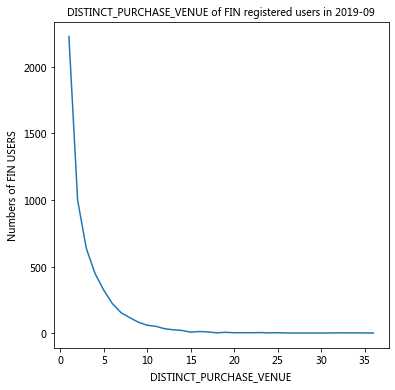

In [867]:
# Create a line plot to show the DISTINCT_PURCHASE_VENUE_COUNT of FIN registered users in 2019-09.
plt.figure(figsize=(6, 6))

# plt.xticks(rotation=45)

plt.xlabel("DISTINCT_PURCHASE_VENUE",fontsize=10)
plt.ylabel("Numbers of FIN USERS",fontsize=10)
plt.title("DISTINCT_PURCHASE_VENUE of FIN registered users in 2019-09", fontsize=10)
plt.plot(list(fin.DISTINCT_PURCHASE_VENUE_COUNT.value_counts().sort_index().index), 
        list(fin.DISTINCT_PURCHASE_VENUE_COUNT.value_counts().sort_index().values))

# 

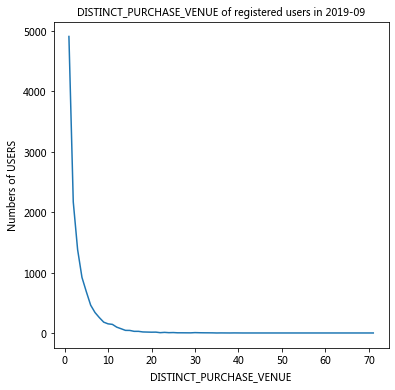

In [876]:
# compare to all registered users in 2019-09.
# Create a line plot to show the DISTINCT_PURCHASE_VENUE_COUNT of all registered users in 2019-09.
plt.figure(figsize=(6, 6))

# plt.xticks(rotation=45)

plt.xlabel("DISTINCT_PURCHASE_VENUE",fontsize=10)
plt.ylabel("Numbers of USERS",fontsize=10)
plt.title("DISTINCT_PURCHASE_VENUE of registered users in 2019-09", fontsize=10)
plt.plot(list(data.DISTINCT_PURCHASE_VENUE_COUNT.value_counts().sort_index().index), 
        list(data.DISTINCT_PURCHASE_VENUE_COUNT.value_counts().sort_index().values))

# 

In [877]:
data.DISTINCT_PURCHASE_VENUE_COUNT.value_counts()

1.0     4903
2.0     2167
3.0     1379
4.0      920
5.0      684
6.0      461
7.0      339
8.0      255
9.0      180
10.0     152
11.0     143
12.0      97
13.0      71
14.0      44
15.0      43
16.0      28
17.0      28
18.0      18
19.0      16
21.0      15
20.0      14
23.0      11
25.0       8
30.0       7
22.0       6
24.0       6
31.0       5
32.0       4
27.0       4
26.0       4
34.0       3
29.0       3
39.0       2
36.0       2
38.0       1
41.0       1
42.0       1
68.0       1
35.0       1
71.0       1
Name: DISTINCT_PURCHASE_VENUE_COUNT, dtype: int64

3.3196707682075157


'\nDisplay the number of venues that users have consumed using a normal distribution. \nFrom the graph, it can be seen that the vast majority of users consumed from 1 to 4 venues, \nindicating that most people do not frequently switch venues when they made orders (in September). \n'

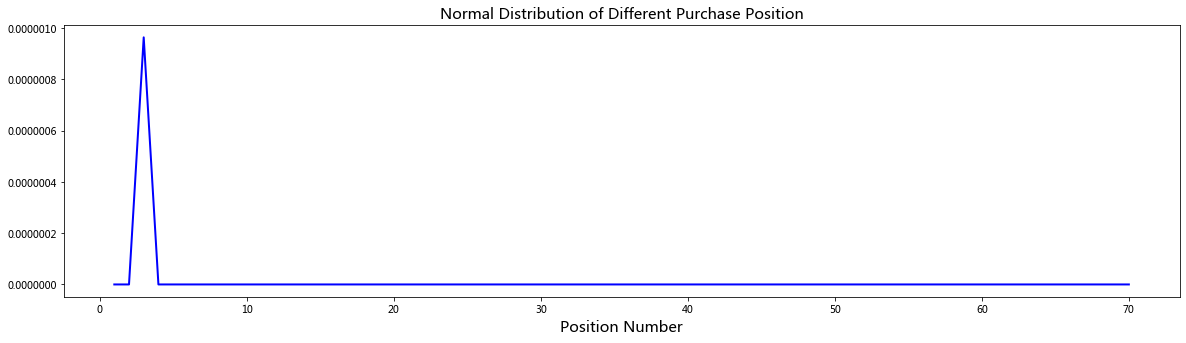

In [706]:
# Users has consumed in several different venues

mu =  np.mean(data.DISTINCT_PURCHASE_VENUE_COUNT)
sigma = np.var(data.DISTINCT_PURCHASE_VENUE_COUNT)
min_value = np.min(data.DISTINCT_PURCHASE_VENUE_COUNT)
max_value = np.max(data.DISTINCT_PURCHASE_VENUE_COUNT)
x = np.arange(min_value, max_value, 1)
# Gaussian distribution function
y1 = np.multiply(np.power(np.sqrt(2 * np.pi) * sigma, -1), np.exp(-np.power(x - mu, 2) / 2 * sigma ** 2))

print(mu)
plt.figure(figsize=(20, 5))
plt.xlabel('Position Number', fontdict={'fontsize':15})
plt.title("Normal Distribution of Different Purchase Position", fontsize=15)
plt.plot(x, y1, 'b-', linewidth=2)
# plt.savefig('./pic/Purchase_Position_distribution.png')

'''
Display the number of distinct venues that FIN registered users in 2019-09 have consumed using a normal distribution. 
From the graph, it can be seen that the vast majority of FIN registered users in 2019-09 consumed from 1 to 4 venues, 
indicating that most people do not frequently switch venues when they made orders until 2020-10. 
'''

## 4.2 Check the PREFERRED_RESTAURANT_TYPES of FIN registered users in 2019-09 and find out what type of food do FIN registered users in 2019-09  like most.

In [786]:
fin.PREFERRED_RESTAURANT_TYPES.value_counts()

[\n  "american"\n]                                                                                   358
[\n  "italian"\n]                                                                                    134
[\n  "japanese"\n]                                                                                   118
[\n  "american",\n  "italian"\n]                                                                      99
[\n  "mexican"\n]                                                                                     96
                                                                                                    ... 
[\n  "american",\n  "japanese",\n  "italian",\n  "mexican",\n  "greek",\n  "indian",\n  "thai"\n]      1
[\n  "indian",\n  "thai"\n]                                                                            1
[\n  "american",\n  "chinese"\n]                                                                       1
[\n  "italian",\n  "american",\n  "mexican",\n  "japane

In [787]:
# Remove white spaces \n from the value of PREFERRED_RESTAURANT_TYPES
fin.PREFERRED_RESTAURANT_TYPES=fin.PREFERRED_RESTAURANT_TYPES.str.replace("\n ","",regex=True)
fin.PREFERRED_RESTAURANT_TYPES=fin.PREFERRED_RESTAURANT_TYPES.str.replace("\n","",regex=True)


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [791]:
type_list=fin[fin.PREFERRED_RESTAURANT_TYPES.notnull()].PREFERRED_RESTAURANT_TYPES.values.tolist()

type_list

['[ "american"]',
 '[ "american"]',
 '[ "italian"]',
 '[ "middle eastern"]',
 '[ "american"]',
 '[ "middle eastern"]',
 '[ "japanese"]',
 '[ "american"]',
 '[ "italian"]',
 '[ "italian", "middle eastern", "american"]',
 '[ "italian", "mexican"]',
 '[ "italian"]',
 '[ "indian"]',
 '[ "american"]',
 '[ "american"]',
 '[ "japanese"]',
 '[ "middle eastern", "italian"]',
 '[ "middle eastern", "italian"]',
 '[ "american", "italian"]',
 '[ "middle eastern"]',
 '[ "american", "mexican"]',
 '[ "american"]',
 '[ "american", "italian", "middle eastern"]',
 '[ "japanese"]',
 '[ "mexican"]',
 '[ "japanese"]',
 '[ "indian", "american"]',
 '[ "japanese"]',
 '[ "american", "mexican", "japanese"]',
 '[ "american"]',
 '[ "indian"]',
 '[ "american", "italian"]',
 '[ "american"]',
 '[ "american"]',
 '[ "middle eastern"]',
 '[ "italian", "middle eastern", "american"]',
 '[ "italian"]',
 '[ "american"]',
 '[ "indian"]',
 '[ "japanese", "middle eastern", "indian"]',
 '[ "american", "italian", "mexican"]',
 '

In [795]:
import json
nested_list = [json.loads(element) for element in type_list]
all_type = set([country for sublist in nested_list for country in sublist])
all_type_list = list(all_type)
all_type_list

['greek',
 'indian',
 'mexican',
 'korean',
 'thai',
 'chinese',
 'american',
 'hawaiian',
 'middle eastern',
 'japanese',
 'nepalese',
 'vietnamese',
 'italian']

In [799]:
counts = {}

for country in all_type_list:
    count = 0
    for restaurant_types in type_list:
        if country in restaurant_types:
            count += 1
    counts[country] = count

print(counts)    

{'greek': 15, 'indian': 155, 'mexican': 271, 'korean': 2, 'thai': 38, 'chinese': 14, 'american': 767, 'hawaiian': 3, 'middle eastern': 199, 'japanese': 256, 'nepalese': 6, 'vietnamese': 16, 'italian': 518}


In [803]:
# Sort the count dictionary by values.
counts_sorted = sorted(counts.items(), key=lambda x: x[1], reverse=True)
counts_sorted

[('american', 767),
 ('italian', 518),
 ('mexican', 271),
 ('japanese', 256),
 ('middle eastern', 199),
 ('indian', 155),
 ('thai', 38),
 ('vietnamese', 16),
 ('greek', 15),
 ('chinese', 14),
 ('nepalese', 6),
 ('hawaiian', 3),
 ('korean', 2)]

<BarContainer object of 13 artists>

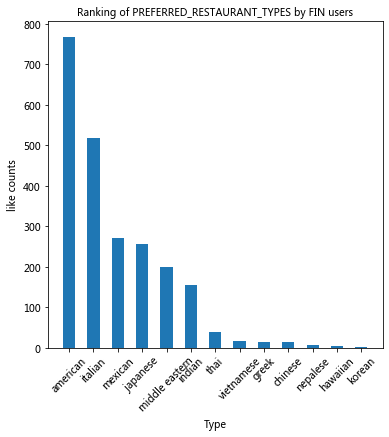

In [805]:
# Create a bar plot to show the ranking of PREFERRED_RESTAURANT_TYPES by FIN registered users in 2019-09.

plt.figure(figsize=(6, 6))

x_value = [i[0] for i in counts_sorted]
y_value = [i[1] for i in counts_sorted]

plt.xlabel("Type",fontsize=10)
plt.xticks(rotation=45)
plt.ylabel("like counts",fontsize=10)
plt.title("Ranking of PREFERRED_RESTAURANT_TYPES by FIN registered users in 2019-09", fontsize=10)
plt.bar(x_value, y_value,width=0.5, align='center')


# Although there are some missing values in PREFERRED_RESTAURANT_TYPES like I analyzed previously, 
# 2019-09 FIN registered users prefered the type American and Italian restaurant most.

## 4.3 PURCHASE_COUNT_BY_STORE_TYPE by FIN registered users in 2019-09 .


In [812]:
fin.PURCHASE_COUNT_BY_STORE_TYPE=fin.PURCHASE_COUNT_BY_STORE_TYPE.str.replace("\n","",regex=True)

In [823]:
fin.PURCHASE_COUNT_BY_STORE_TYPE

1        {  "General merchandise": 0,  "Grocery": 0,  "...
3        {  "General merchandise": 0,  "Grocery": 0,  "...
5        {  "General merchandise": 0,  "Grocery": 0,  "...
7        {  "General merchandise": 0,  "Grocery": 0,  "...
8        {  "General merchandise": 0,  "Grocery": 0,  "...
                               ...                        
21956    {  "General merchandise": 0,  "Grocery": 0,  "...
21965    {  "General merchandise": 0,  "Grocery": 0,  "...
21969    {  "General merchandise": 0,  "Grocery": 0,  "...
21972    {  "General merchandise": 0,  "Grocery": 0,  "...
21973    {  "General merchandise": 0,  "Grocery": 0,  "...
Name: PURCHASE_COUNT_BY_STORE_TYPE, Length: 10277, dtype: object

In [829]:
# Convert to the value of fin.PURCHASE_COUNT_BY_STORE_TYPE to dictionary.
dic_list = [json.loads(element) for element in fin.PURCHASE_COUNT_BY_STORE_TYPE]
dic_list

[{'General merchandise': 0,
  'Grocery': 0,
  'Pet supplies': 0,
  'Restaurant': 1,
  'Retail store': 0},
 {'General merchandise': 0,
  'Grocery': 0,
  'Pet supplies': 0,
  'Restaurant': 0,
  'Retail store': 0},
 {'General merchandise': 0,
  'Grocery': 0,
  'Pet supplies': 0,
  'Restaurant': 0,
  'Retail store': 0},
 {'General merchandise': 0,
  'Grocery': 0,
  'Pet supplies': 0,
  'Restaurant': 1,
  'Retail store': 0},
 {'General merchandise': 0,
  'Grocery': 0,
  'Pet supplies': 0,
  'Restaurant': 0,
  'Retail store': 0},
 {'General merchandise': 0,
  'Grocery': 0,
  'Pet supplies': 0,
  'Restaurant': 0,
  'Retail store': 0},
 {'General merchandise': 0,
  'Grocery': 0,
  'Pet supplies': 0,
  'Restaurant': 0,
  'Retail store': 0},
 {'General merchandise': 0,
  'Grocery': 0,
  'Pet supplies': 0,
  'Restaurant': 0,
  'Retail store': 0},
 {'General merchandise': 1,
  'Grocery': 9,
  'Pet supplies': 0,
  'Restaurant': 9,
  'Retail store': 0},
 {'General merchandise': 0,
  'Grocery': 0,
  

In [833]:
# PURCHASE_COUNT_BY_STORE_TYPE, check how many purchases from different store types.
counts_store_type = {}

for dic in dic_list:
    for key, value in dic.items():
        if key in counts_store_type:
            counts_store_type[key] += value
        else:
            counts_store_type[key] = value
            


counts_store_type_sorted = sorted(counts_store_type.items(), key=lambda x: x[1], reverse=True)
counts_store_type_sorted


[('Restaurant', 20784),
 ('Retail store', 6895),
 ('Grocery', 6184),
 ('General merchandise', 687),
 ('Pet supplies', 84)]

<BarContainer object of 5 artists>

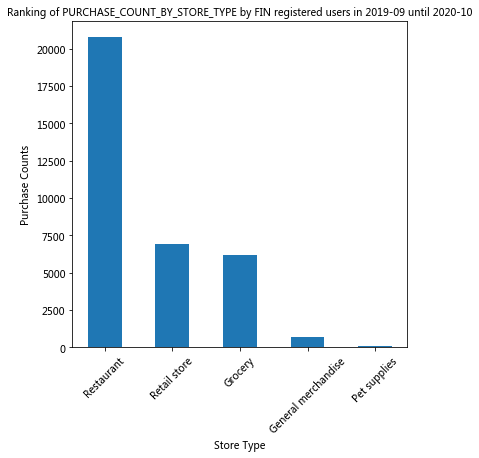

In [834]:
# Create a bar plot to show the ranking of PURCHASE_COUNT_BY_STORE_TYPE by FIN registered users in 2019-09.

plt.figure(figsize=(6, 6))

x_value = [i[0] for i in counts_store_type_sorted]
y_value = [i[1] for i in counts_store_type_sorted]

plt.xlabel("Store Type",fontsize=10)
plt.xticks(rotation=45)
plt.ylabel("Purchase Counts",fontsize=10)
plt.title("Ranking of PURCHASE_COUNT_BY_STORE_TYPE by FIN registered users in 2019-09 until 2020-10", fontsize=10)
plt.bar(x_value, y_value,width=0.5, align='center')


# 2019-09 registers in FIN have the most purchase in restaurant. Followed by retail store and grocery. 


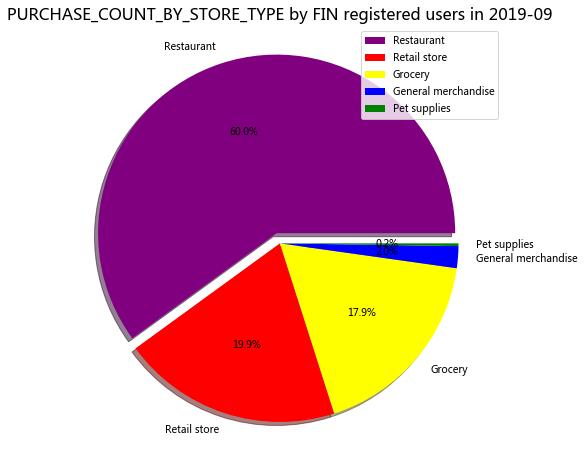

In [866]:
# Create a pie chart to show the ranking of PURCHASE_COUNT_BY_STORE_TYPE by FIN registered users in 2019-09.
plt.figure(figsize=(8, 8))


expodes = (0.06,0.0,0.0,0.0,0.0)
plt.axis('equal')
labels = [i[0] for i in counts_store_type_sorted]
colors = ['purple', 'red',"yellow","blue","green"]
plt.title("PURCHASE_COUNT_BY_STORE_TYPE by FIN registered users in 2019-09", fontsize=16)
plt.pie([i[1] for i in counts_store_type_sorted], labels=labels, shadow=True,autopct='%3.1f%%', explode=expodes, pctdistance=0.6, colors=colors)
plt.legend(labels=labels)

# restaurant : 60.0% 
# retail store : 19.9%
# grocery : 17.9%

# 2019-09 registers in FIN have the most purchase in restaurant(60.0%). Followed by retail store (19.9%) and grocery(17.9%). 


# 5. Free analysis 

In [870]:
# corr and heatmap

corr_matrix = data.corr()
corr_matrix

,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,...,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,TOTAL_SALES
PURCHASE_COUNT,1.000000,0.991383,0.224273,0.002814,0.465892,0.878897,0.502943,0.830940,NaN,0.855484,...,0.613254,0.457483,0.582482,0.272436,-0.001713,-0.005474,-0.305343,-0.294681,-0.017917,0.855076
PURCHASE_COUNT_DELIVERY,0.991383,1.000000,0.094678,0.000211,0.463007,0.874663,0.507699,0.816679,NaN,0.843683,...,0.603878,0.457506,0.579144,0.098020,-0.003274,-0.006975,-0.297010,-0.286130,-0.018863,0.843284
PURCHASE_COUNT_TAKEAWAY,0.224273,0.094678,1.000000,-0.000643,0.096085,0.172261,0.045175,0.239175,NaN,0.224806,...,0.167970,0.073102,0.118125,-0.005951,0.011334,0.010293,-0.095288,-0.095596,0.004169,0.224683
USER_ID,0.002814,0.000211,-0.000643,1.000000,-0.011287,0.000432,0.005909,-0.000422,NaN,0.010329,...,-0.011035,0.005558,0.008296,0.011987,0.005419,0.010081,0.007733,0.009009,0.007476,0.010351
BREAKFAST_PURCHASES,0.465892,0.463007,0.096085,-0.011287,1.000000,0.478130,0.187306,0.163211,NaN,0.297158,...,0.254705,0.283836,0.255886,0.058612,-0.009466,0.010594,-0.101923,-0.098949,-0.009410,0.295913
LUNCH_PURCHASES,0.878897,0.874663,0.172261,0.000432,0.478130,1.000000,0.301188,0.521731,NaN,0.700946,...,0.492169,0.429647,0.543559,0.087245,0.001494,-0.000220,-0.238233,-0.229388,-0.010375,0.700897
EVENING_PURCHASES,0.502943,0.507699,0.045175,0.005909,0.187306,0.301188,1.000000,0.313983,NaN,0.305814,...,0.342932,0.187785,0.284930,0.070083,-0.010590,-0.010177,-0.150463,-0.144730,-0.007568,0.304565
DINNER_PURCHASES,0.830940,0.816679,0.239175,-0.000422,0.163211,0.521731,0.313983,1.000000,NaN,0.830131,...,0.553808,0.351765,0.455757,0.064084,0.000810,-0.009307,-0.285400,-0.276077,-0.020690,0.830060
LATE_NIGHT_PURCHASES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TOTAL_PURCHASES_EUR,0.855484,0.843683,0.224806,0.010329,0.297158,0.700946,0.305814,0.830131,NaN,1.000000,...,0.547406,0.398936,0.468349,0.084081,0.006333,-0.010219,-0.280035,-0.272585,-0.016868,0.999920


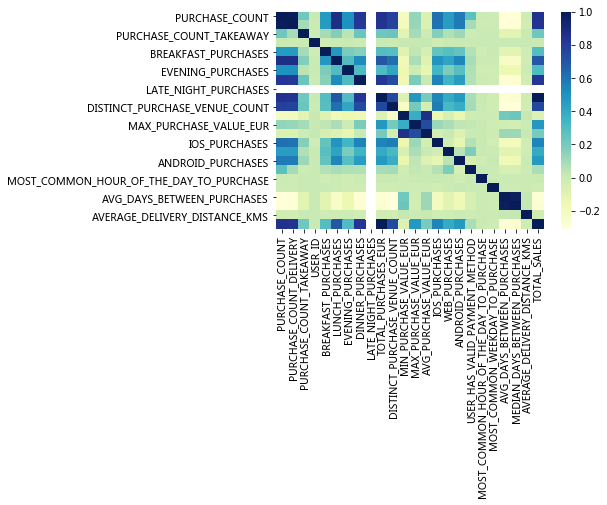

In [874]:
# Create a heatmap to show the corr.
sns.heatmap(corr_matrix, cmap="YlGnBu")

# The darker the more corr.

# For example, the most closely related to PUCHASE_COUNT is PURCHASE_COUNT_DELIVERY, 
# This means that the vast majority of registered users in 2019-09 who made orders required delivery. 
# Additionally, the field that is closely related to the order frequency is the 'number of lunch orders'. 
# In short, among breakfast, lunch, and dinner orders, 
# the lunch order quantity has the highest contribution to the total number of orders, followed by dinner.


# Looking at the negative correlation coefficients, the largest is the 'MEDIAN_DAYS_BETWEEN_PURCHASES, 
# This means that the more orders are placed, the shorter the average time between orders is.
# This conclusion based on the correlation is also quite consistent with the actual situation, which can be regarded as a validation.

In [10]:
# Clustering 
from sklearn import preprocessing
from sklearn.cluster import KMeans

data.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [11]:
# Fill null value as 0, most null values can be replaced by 0, some are exceptions, such as "MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE"
# and "MOST_COMMON_WEEKDAY_TO_PURCHASE".
data_cluster = data.fillna(0)
data_cluster.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,0.0,0.0,0,0,1,0.0,0.0,...,0.0,0.0,0,False,0.0,0.0,0.0,0.0,0.000,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,0.0,1.0,0,False,23.0,2.0,0.0,0.0,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,19.0,0.0,0,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,0.0,0.0,0,0,4,0.0,0.0,...,0.0,0.0,0,False,0.0,0.0,0.0,0.0,0.000,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,0.0,0.0,0,0,5,0.0,0.0,...,0.0,0.0,0,False,0.0,0.0,0.0,0.0,0.000,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [881]:
data_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  21983 non-null  float64
 4   PURCHASE_COUNT_TAKEAWAY                  21983 non-null  float64
 5   FIRST_PURCHASE_DAY                       21983 non-null  object 
 6   LAST_PURCHASE_DAY                        21983 non-null  object 
 7   USER_ID                                  21983 non-null  int64  
 8   BREAKFAST_PURCHASES                      21983 non-null  float64
 9   LUNCH_PURCHASES                          21983 non-null  float64
 10  EVENING_PURCHASES                        21983

In [12]:
column = ["PURCHASE_COUNT","PURCHASE_COUNT_DELIVERY","PURCHASE_COUNT_TAKEAWAY","BREAKFAST_PURCHASES","LUNCH_PURCHASES",
         "EVENING_PURCHASES","DINNER_PURCHASES","LATE_NIGHT_PURCHASES","TOTAL_PURCHASES_EUR","DISTINCT_PURCHASE_VENUE_COUNT",
         "MIN_PURCHASE_VALUE_EUR","MAX_PURCHASE_VALUE_EUR","AVG_PURCHASE_VALUE_EUR","IOS_PURCHASES","WEB_PURCHASES",
         "ANDROID_PURCHASES","MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE","MOST_COMMON_WEEKDAY_TO_PURCHASE",
         "AVG_DAYS_BETWEEN_PURCHASES","MEDIAN_DAYS_BETWEEN_PURCHASES","AVERAGE_DELIVERY_DISTANCE_KMS"]
data_cluster = data_cluster[column]
data_cluster.head()

,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,...,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,38.456,1.0,...,38.608,38.456,0.0,0.0,1.0,23.0,2.0,0.0,0.0,6.853
2,19,19.0,0.0,0.0,4.0,1.0,14.0,0.0,631.488,9.0,...,43.688,33.396,0.0,19.0,0.0,21.0,2.0,9.0,3.0,6.559
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [13]:
# Scale/Standardize the data

data_cluster_s = data_cluster.apply(lambda x: preprocessing.scale(x))
data_cluster_s.head()

,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,...,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS
0,-0.392510,-0.378464,-0.191558,-0.129057,-0.300383,-0.196489,-0.398630,0.0,-0.405136,-0.560761,...,-0.622755,-0.782391,-0.278372,-0.161842,-0.227051,-0.818898,-0.881562,-0.431037,-0.381431,-0.831735
1,-0.275181,-0.257994,-0.191558,-0.129057,-0.069231,-0.196489,-0.398630,0.0,-0.243541,-0.252033,...,0.421811,0.980379,-0.278372,-0.161842,-0.034680,2.173904,-0.078055,-0.431037,-0.381431,0.915793
2,1.836758,1.910467,-0.191558,-0.129057,0.624225,0.531300,2.968735,0.0,2.248417,2.217794,...,0.559254,0.748436,-0.278372,5.157472,-0.227051,1.913660,-0.078055,-0.261680,-0.323863,0.840822
3,-0.392510,-0.378464,-0.191558,-0.129057,-0.300383,-0.196489,-0.398630,0.0,-0.405136,-0.560761,...,-0.622755,-0.782391,-0.278372,-0.161842,-0.227051,-0.818898,-0.881562,-0.431037,-0.381431,-0.831735
4,-0.392510,-0.378464,-0.191558,-0.129057,-0.300383,-0.196489,-0.398630,0.0,-0.405136,-0.560761,...,-0.622755,-0.782391,-0.278372,-0.161842,-0.227051,-0.818898,-0.881562,-0.431037,-0.381431,-0.831735


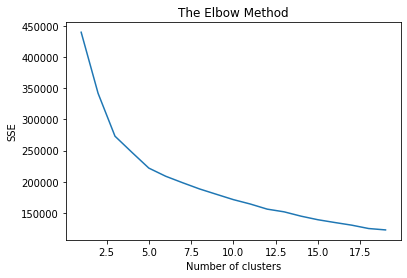

In [14]:
# Determine the optimal number of clusters, in this case it could be 5.

clust = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_cluster_s)
    clust.append(kmeans.inertia_)
    
plt.plot(range(1, 20), clust)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [15]:
# Run clustering

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

y_clust = kmeans.fit_predict(data_cluster_s)

In [16]:
# The number of each cluster.
l = {}
for i in range(5):
    l[i] = (sum(kmeans.labels_ == i))
l

{0: 1375, 1: 10258, 2: 9123, 3: 66, 4: 1161}

In [892]:
# Look at the resulting clusters and get some insights.

data_cluster.groupby(y_clust).mean()


# For example:

# Cluster 0 and 3 have significant difference in many columns such as PURCHASE_COUNT.
# Cluster 1 and 2, 3 have significant difference in columns such as DINNER_PURCHASES and TOTAL_PURCHASES_EUR.
# Cluster 4 has the significant largest values of AVG_DAYS_BETWEEN_PURCHASES.
# ... 



,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,...,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS
0,23.650909,22.304000,1.346909,0.661818,9.207273,1.910545,11.785455,0.0,672.402976,9.927273,...,62.285603,29.704224,11.789818,3.626182,8.234909,11.677091,3.986182,17.388364,9.933091,5.763732
1,0.041529,0.038507,0.003022,0.001657,0.019010,0.006434,0.014330,0.0,0.480547,0.035484,...,0.367456,0.351803,0.016670,0.006629,0.018230,0.146910,0.066875,0.146130,0.131897,0.076074
2,3.448537,3.205196,0.243341,0.104680,1.272279,0.272060,1.785049,0.0,104.448539,2.400636,...,39.610413,31.683931,1.626000,0.590924,1.231612,11.715444,4.073550,26.082539,19.811356,6.084426
3,94.954545,93.196970,1.757576,5.681818,47.636364,8.287879,33.196970,0.0,2079.752000,22.439394,...,52.293212,22.632000,34.454545,25.075758,35.424242,10.863636,4.106061,4.196970,2.181818,6.341348
4,2.469423,2.244617,0.224806,0.065461,0.827735,0.183463,1.382429,0.0,85.984262,2.181740,...,44.586736,34.638991,1.203273,0.523686,0.742463,11.357450,3.993109,206.641688,207.639966,6.088953


In [894]:
# Looking at a specific cluster

data_cluster[y_clust == 1]

# cluster 1 seems to consist mostly of users who have 0 purchase.

,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,...,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21977,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
21979,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
21980,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
21981,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [897]:
# Confirm 
data_cluster[y_clust == 1].PURCHASE_COUNT.value_counts()

0     9955
1      238
2       35
3       14
4       10
5        5
11       1
Name: PURCHASE_COUNT, dtype: int64

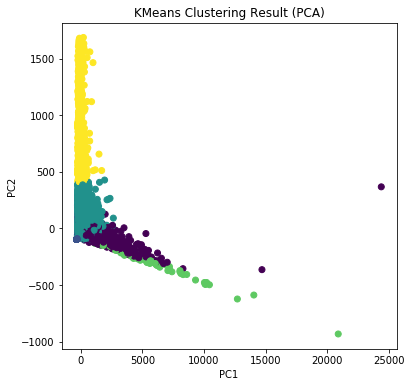

In [26]:
# Visualize 
from sklearn.decomposition import PCA

data_cluster["Cluster"]=y_clust


pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_cluster)


data_cluster['PC1'] = X_pca[:, 0]
data_cluster['PC2'] = X_pca[:, 1]

labels=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

plt.figure(figsize=(6, 6))


plt.scatter(data_cluster['PC1'], data_cluster['PC2'], c=data_cluster['Cluster'], label=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clustering Result (PCA)')
# plt.legend(labels=labels)
plt.show()

In [455]:
# USER_HAS_VALID_PAYMENT_METHOD missing values.
data.USER_HAS_VALID_PAYMENT_METHOD.value_counts()
# why 12028 users have made orders, and there are only 7568 users have valid payment method?
# Maybe valid payment method such as a credit card that has expired.

False    14415
True      7568
Name: USER_HAS_VALID_PAYMENT_METHOD, dtype: int64